In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import src.utils.plot_config
import matplotlib.pyplot as plt
import src.utils.data_utils as data_utils
import src.utils.consistency_utils as consistency_utils

# Check if LaTeX is available, if not we don't import the plot_config module
latex_available = False
try:
    plt.rcParams['text.usetex'] = True
    plt.text(0, 0, "Test", fontsize=12)
    latex_available = True
    plt.close()
except Exception as e:
    print("LaTeX is not available. Error:", e)
finally:
    plt.rcParams['text.usetex'] = False 

# Import the plot_config module if LaTeX is available
if latex_available:
    import src.utils.plot_config

In [2]:
ROOT_PATH = os.getcwd()
DATA_PATH = os.path.join(ROOT_PATH, 'data')
TIME_SERIES_PATH = os.path.join(DATA_PATH, 'time_series')
CHANNELS_PATH = os.path.join(DATA_PATH, 'channels')
VIDEO_METADATA_PATH = os.path.join(DATA_PATH, 'video_metadata')

In [312]:
# Load Time-series DataFrame
df_time_series = pd.read_csv(os.path.join(DATA_PATH, "time_series.tsv.gz"), sep="\t", compression="gzip")

# Clean Nan entries and separate into Music and Entertainment DataFrames
df_time_series_music, df_time_series_entertainment = consistency_utils.clean_and_categorize(df_time_series)

In [313]:
# Basic stats
# Music
consistency_utils.basic_stats(df_time_series_music, category='Music')

# Entertainment
consistency_utils.basic_stats(df_time_series_entertainment, category='Entertainment')

Number of entries for Music category: 3532411
Number of entries for Music with delta_videos >= 1: 1085043       (30.72% of total)
Number of entries for Entertainment category: 3071292
Number of entries for Entertainment with delta_videos >= 1: 1450136       (47.22% of total)


c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['datetime'] = pd.to_datetime(df_music['datetime'])
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ent['datetime'] = pd.to_datetime(df_ent['datetime'])


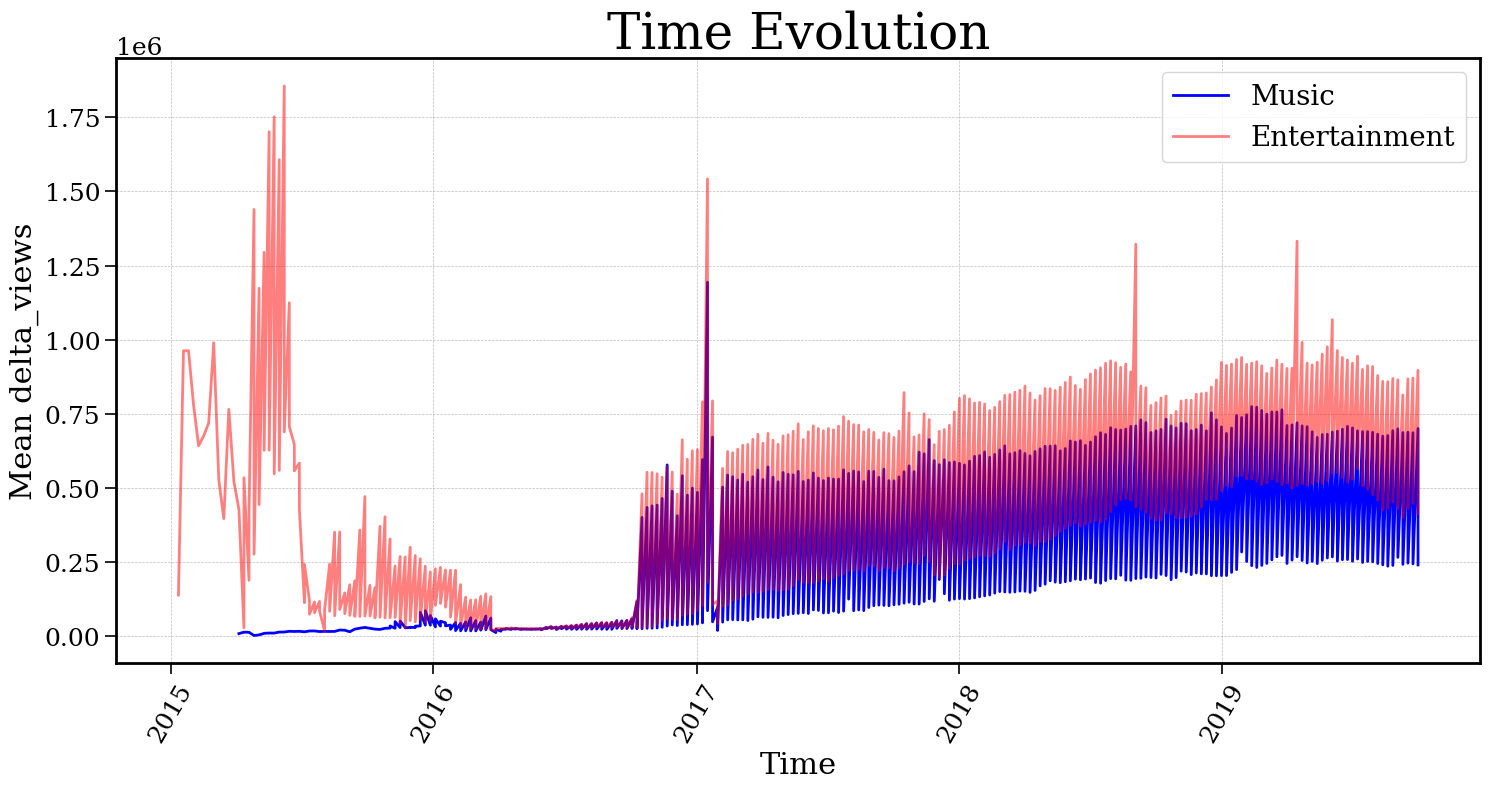

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['datetime'] = pd.to_datetime(df_music['datetime'])
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ent['datetime'] = pd.to_datetime(df_ent['datetime'])


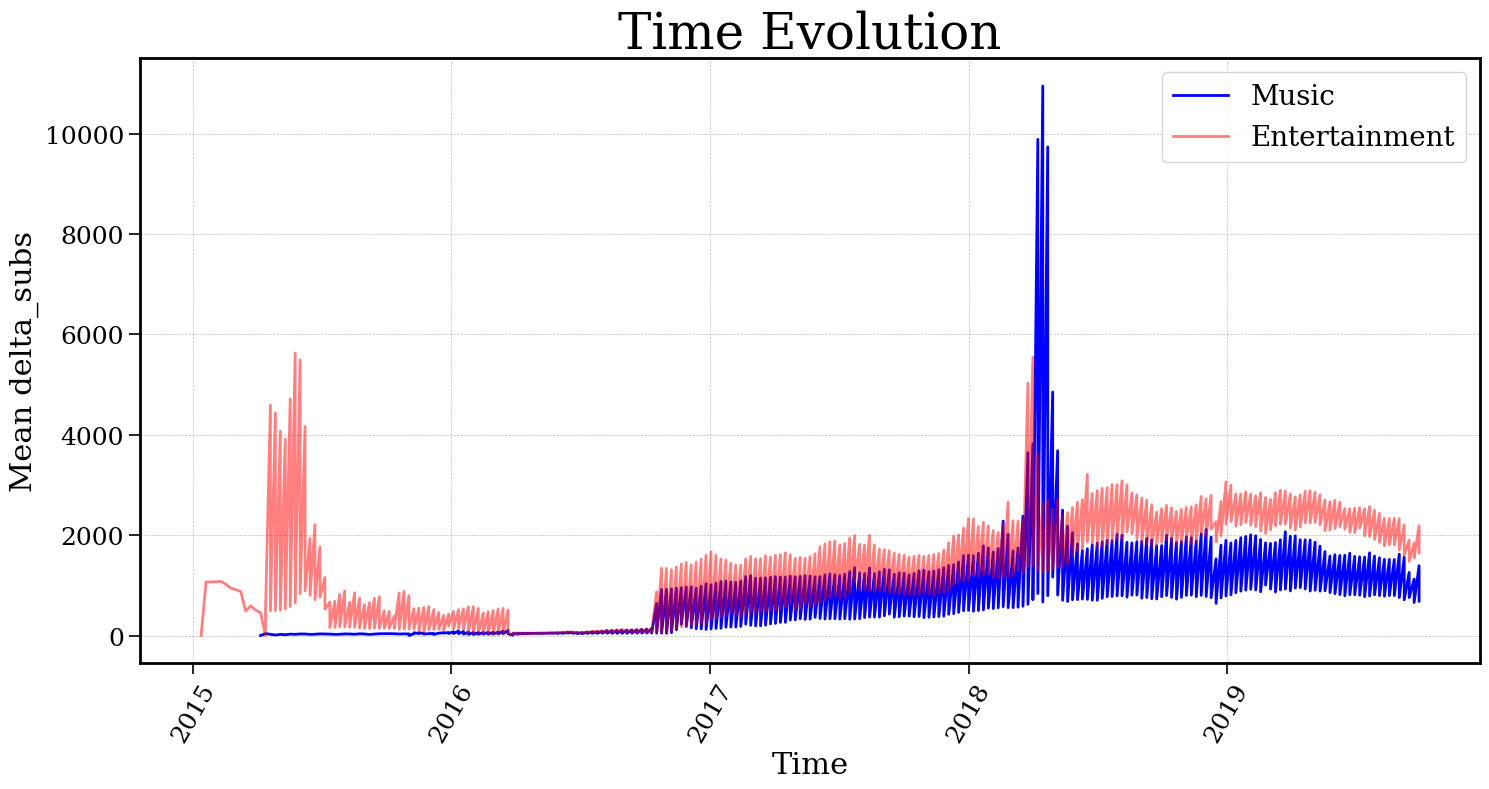

In [11]:
# Time Evolution of delta_views mean
consistency_utils.plot_general_mean(df_time_series_music, df_time_series_entertainment, metric='delta_views')

# Time Evolution of delta_subs mean
consistency_utils.plot_general_mean(df_time_series_music, df_time_series_entertainment, metric='delta_subs')

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['datetime'] = pd.to_datetime(df_music['datetime'])
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ent['datetime'] = pd.to_datetime(df_ent['datetime'])


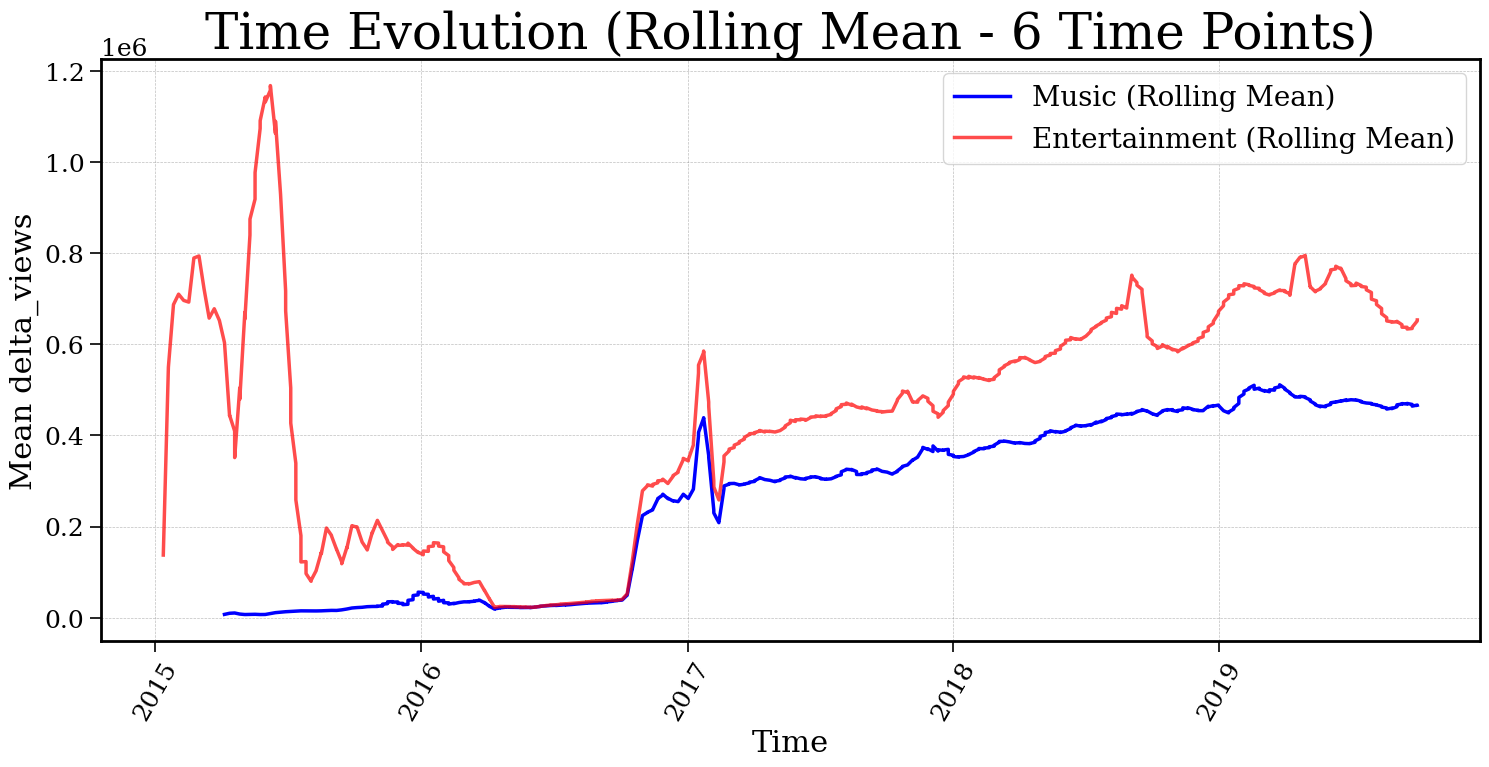

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['datetime'] = pd.to_datetime(df_music['datetime'])
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ent['datetime'] = pd.to_datetime(df_ent['datetime'])


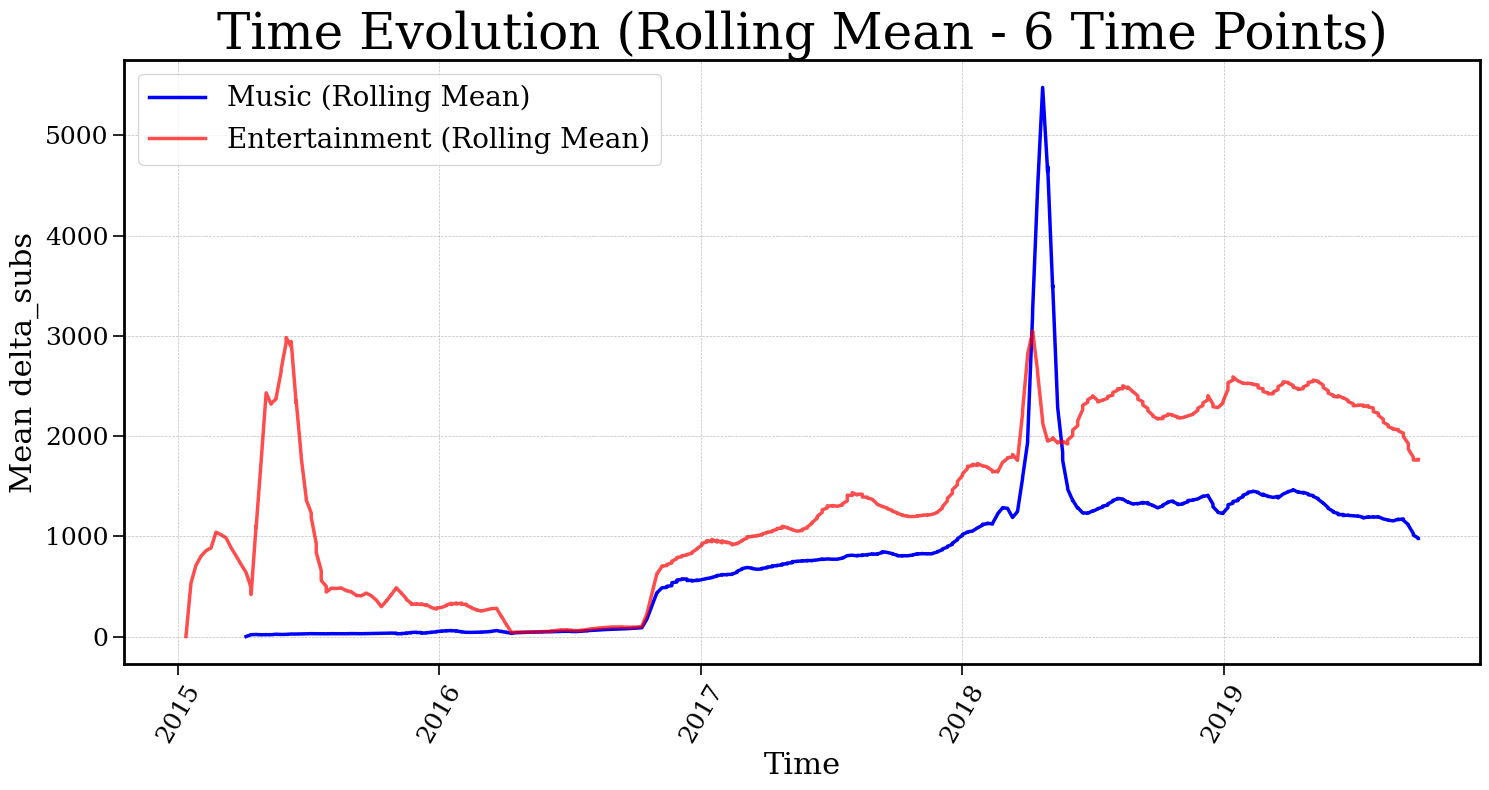

In [13]:
# Rolling average of time evolution of delta_views mean
consistency_utils.plot_general_rolling_mean(df_time_series_music, df_time_series_entertainment, metric='delta_views', rolling_window=6)

# Rolling average of time evolution of delta_subs mean
consistency_utils.plot_general_rolling_mean(df_time_series_music, df_time_series_entertainment, metric='delta_subs', rolling_window=6)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['datetime'] = pd.to_datetime(df_music['datetime'])
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ent['datetime'] = pd.to_datetime(df_ent['datetime'])


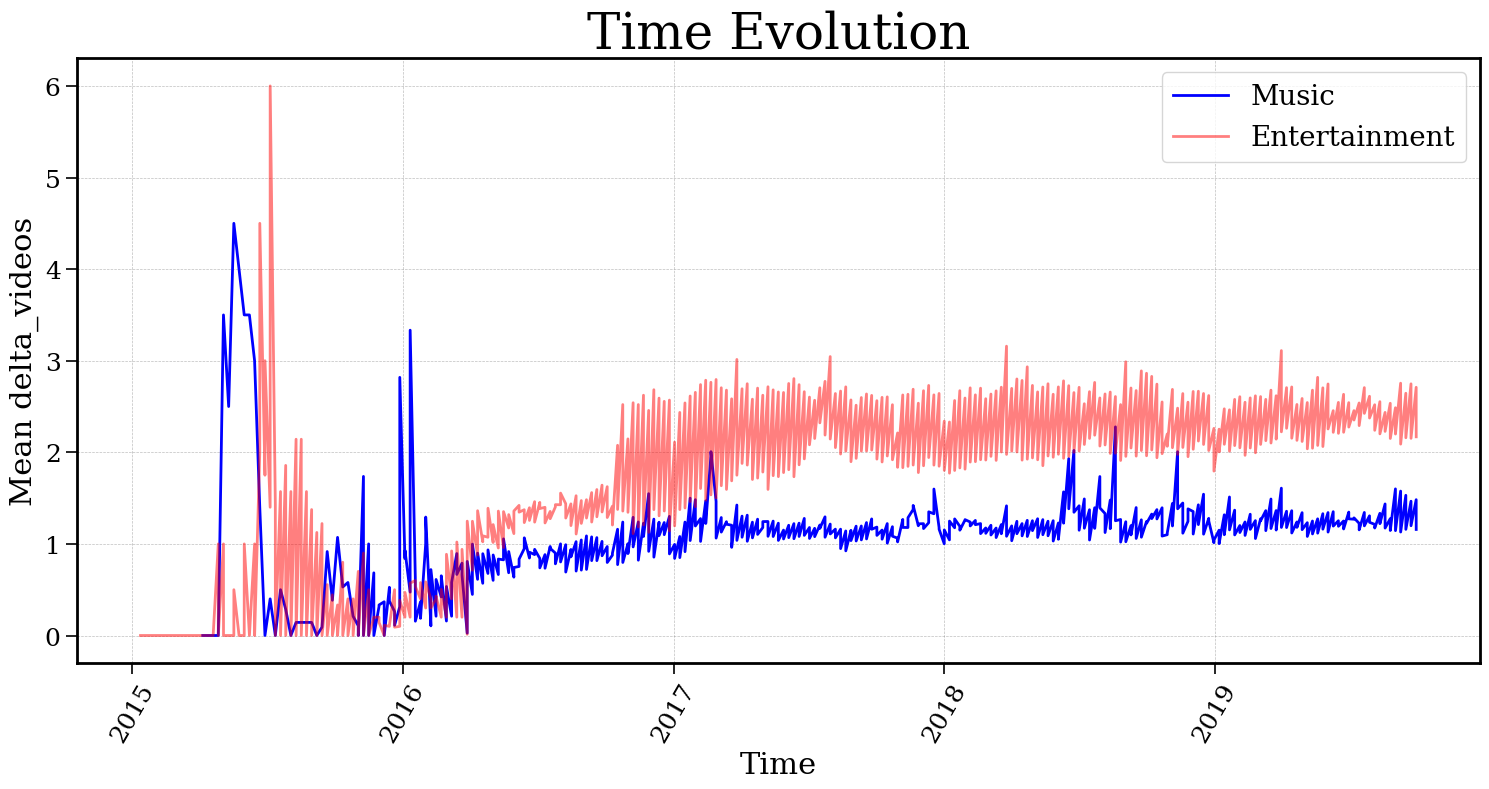

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['datetime'] = pd.to_datetime(df_music['datetime'])
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ent['datetime'] = pd.to_datetime(df_ent['datetime'])


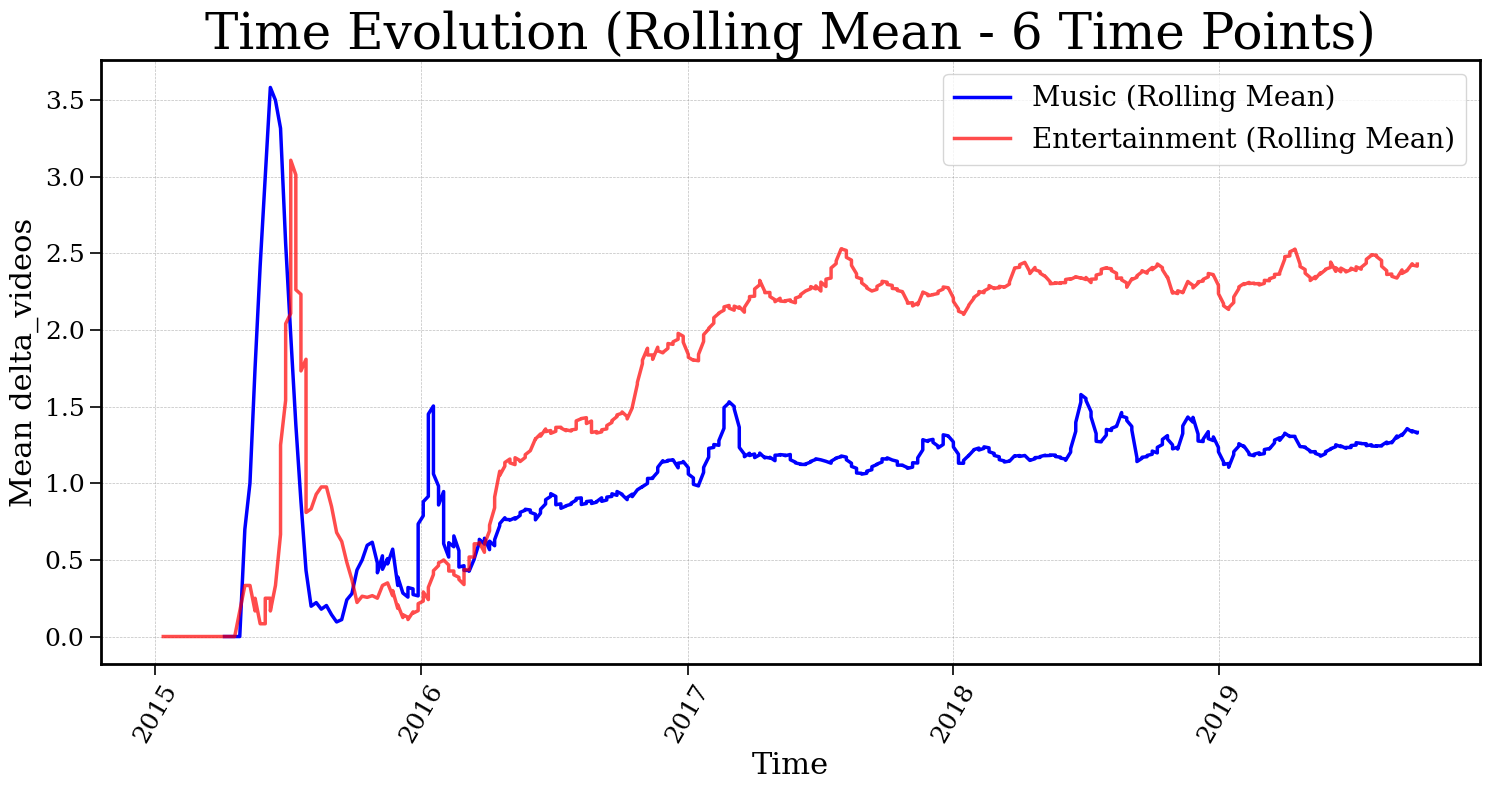

In [15]:
# Time Evolution of delta_videos mean
consistency_utils.plot_general_mean(df_time_series_music, df_time_series_entertainment, metric='delta_videos')

# Rolling average of time Evolution of delta_videos mean
consistency_utils.plot_general_rolling_mean(df_time_series_music, df_time_series_entertainment, metric='delta_videos', rolling_window=6)

In [40]:
# Calculate Delta_views Evolution for time periods 1 (4 weeks) to 8 months (32 weeks) following upload of a video
weeks = [4, 8, 12, 16, 20, 24, 28, 32]
df_delta_views_list = consistency_utils.calculate_metric_values_all_weeks(df_time_series_music, df_time_series_entertainment, weeks=weeks, metric='delta_views')

Number of initial video entries for n_weeks = 4: 522076
Number of valid entries for n_weeks = 4: 105840
Number of initial video entries for n_weeks = 4: 583256
Number of valid entries for n_weeks = 4: 70822
Number of initial video entries for n_weeks = 8: 522076
Number of valid entries for n_weeks = 8: 54816
Number of initial video entries for n_weeks = 8: 583256
Number of valid entries for n_weeks = 8: 32685
Number of initial video entries for n_weeks = 12: 522076
Number of valid entries for n_weeks = 12: 34535
Number of initial video entries for n_weeks = 12: 583256
Number of valid entries for n_weeks = 12: 19614
Number of initial video entries for n_weeks = 16: 522076
Number of valid entries for n_weeks = 16: 23763
Number of initial video entries for n_weeks = 16: 583256
Number of valid entries for n_weeks = 16: 13147
Number of initial video entries for n_weeks = 20: 522076
Number of valid entries for n_weeks = 20: 17392
Number of initial video entries for n_weeks = 20: 583256
Numbe

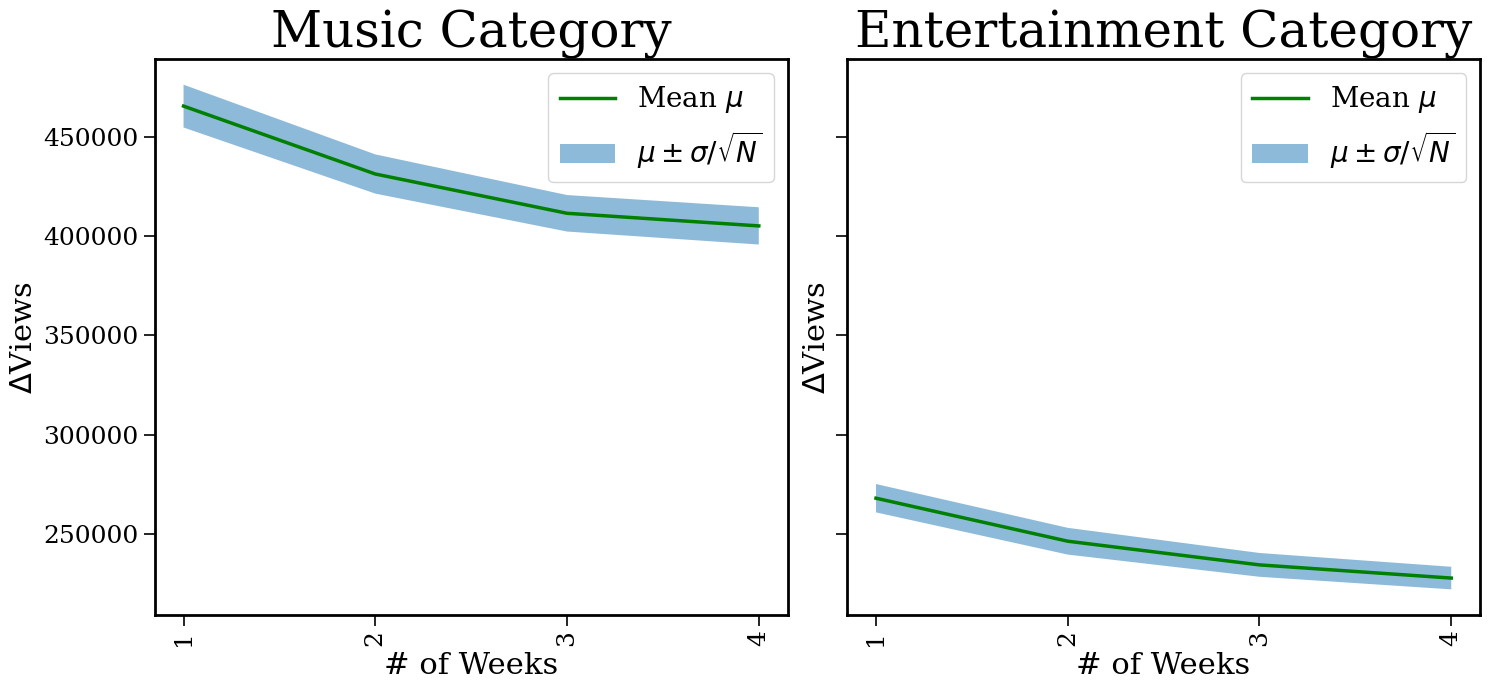

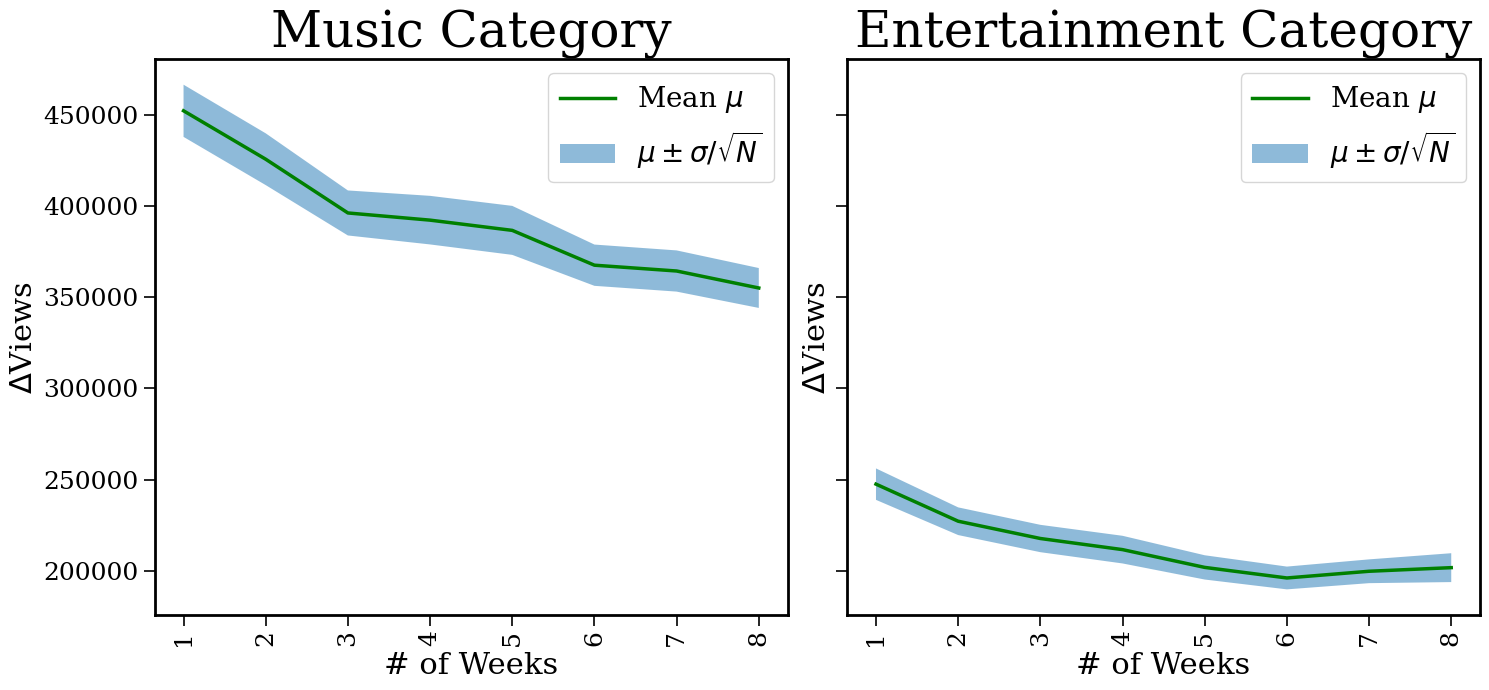

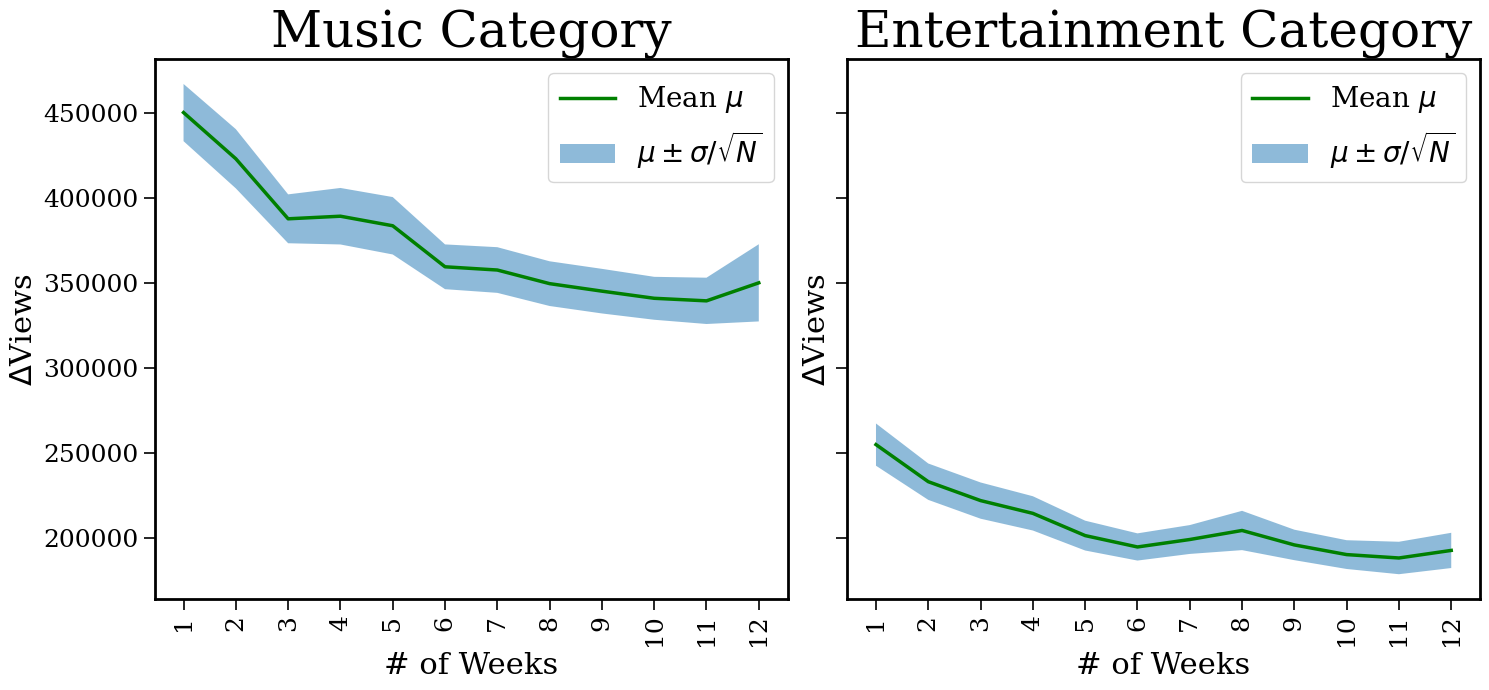

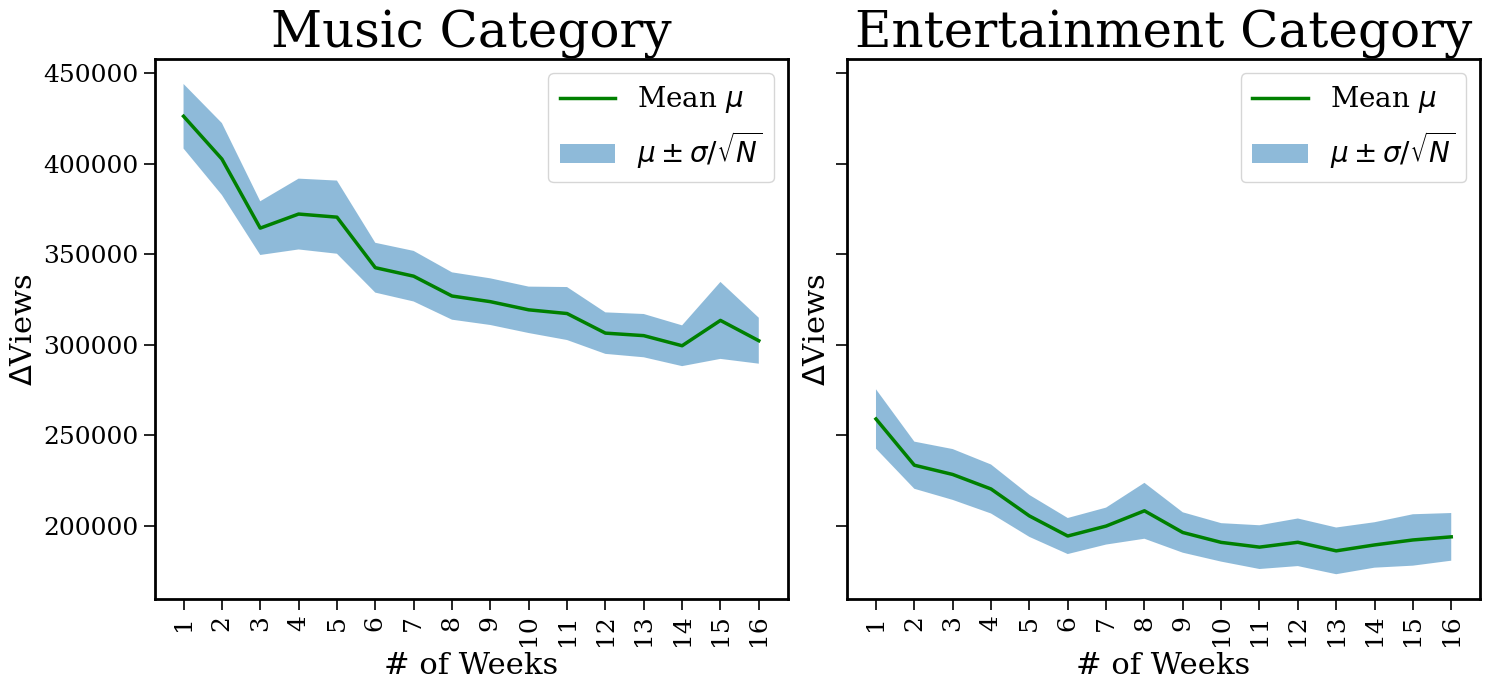

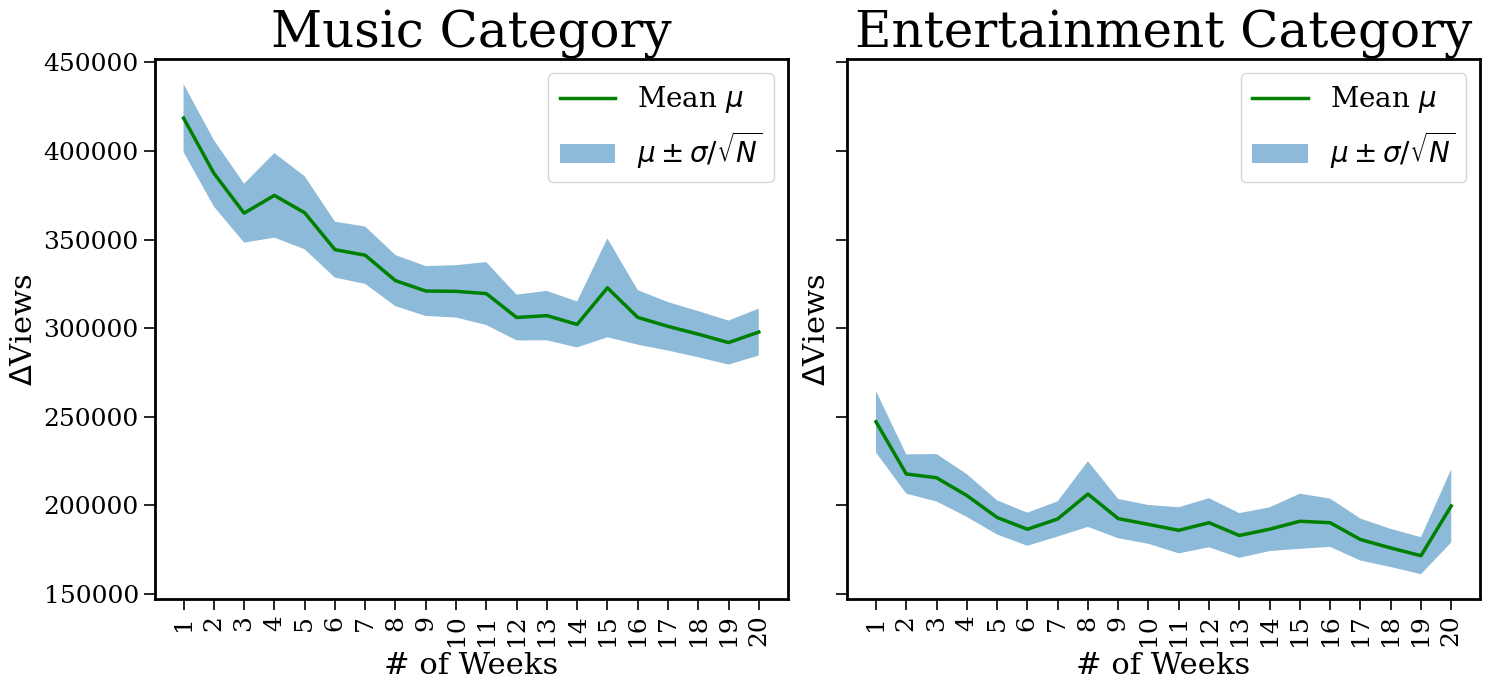

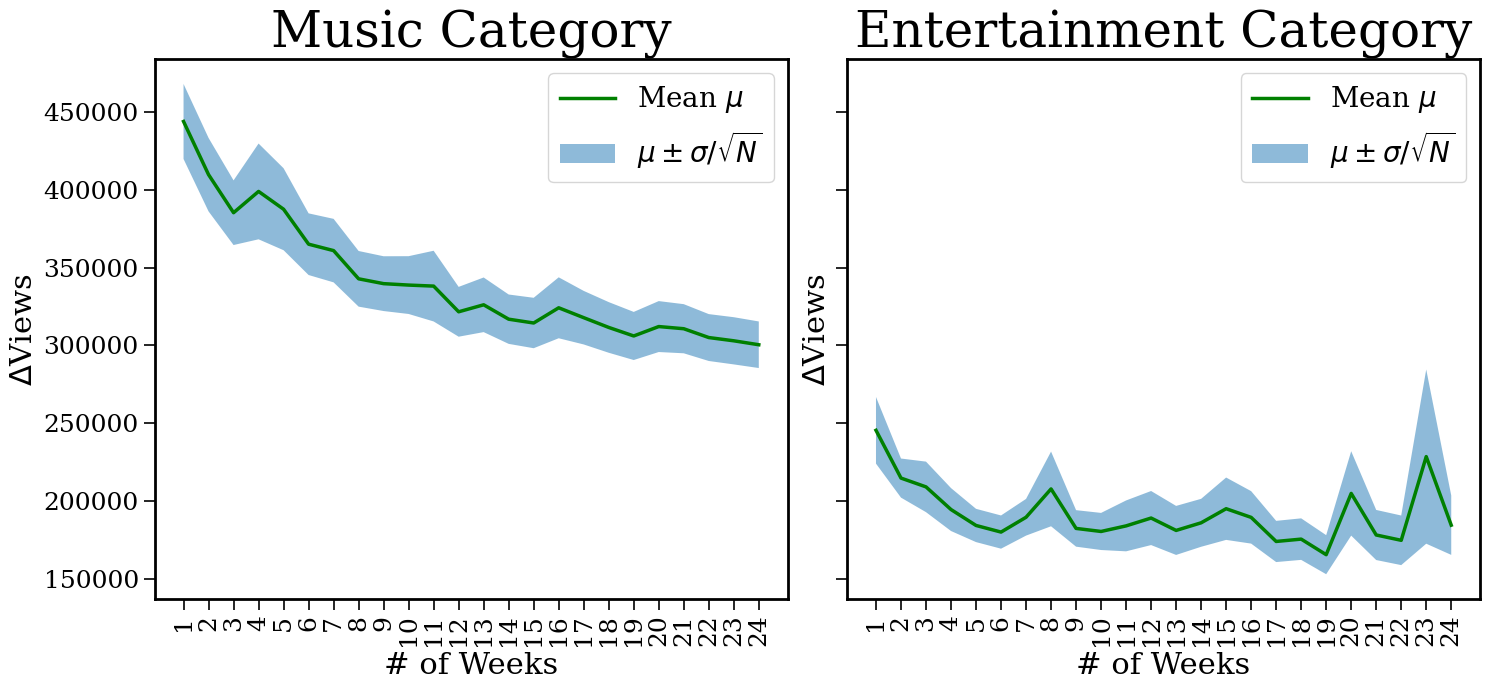

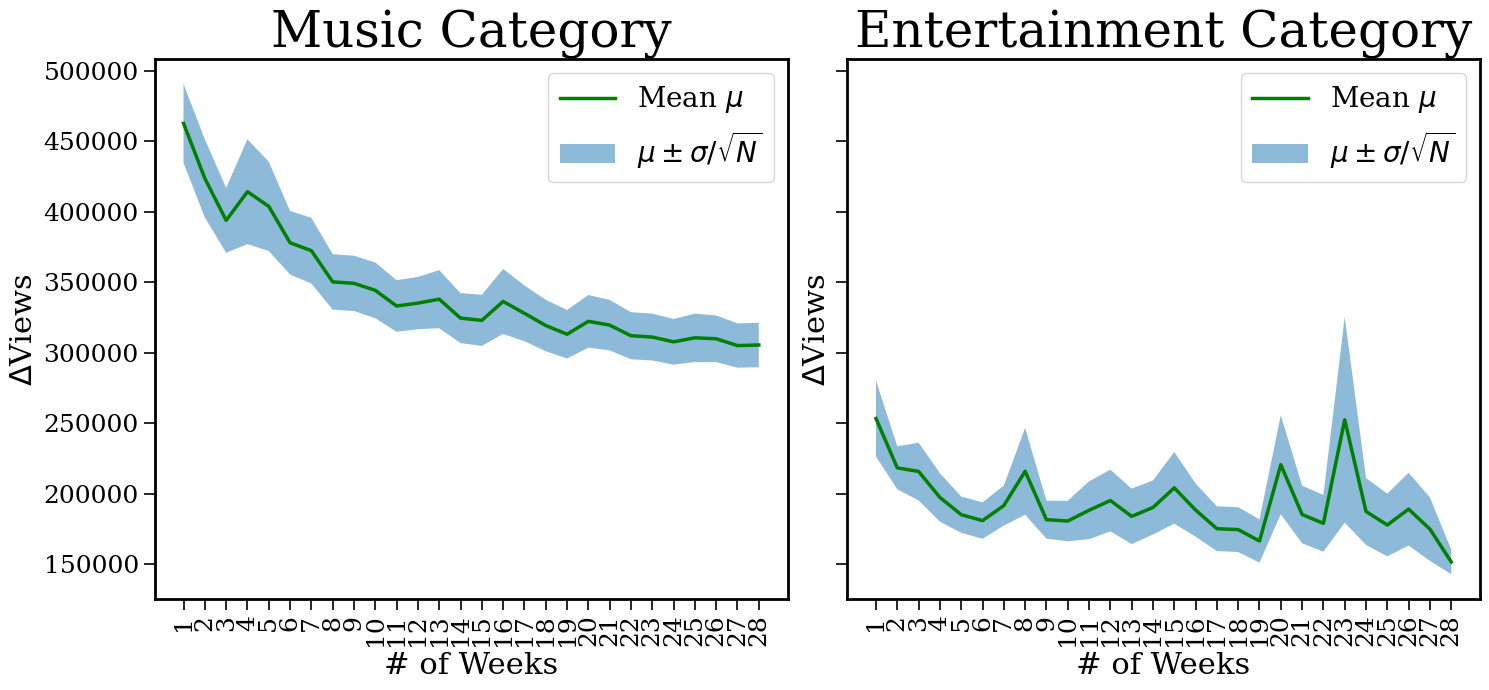

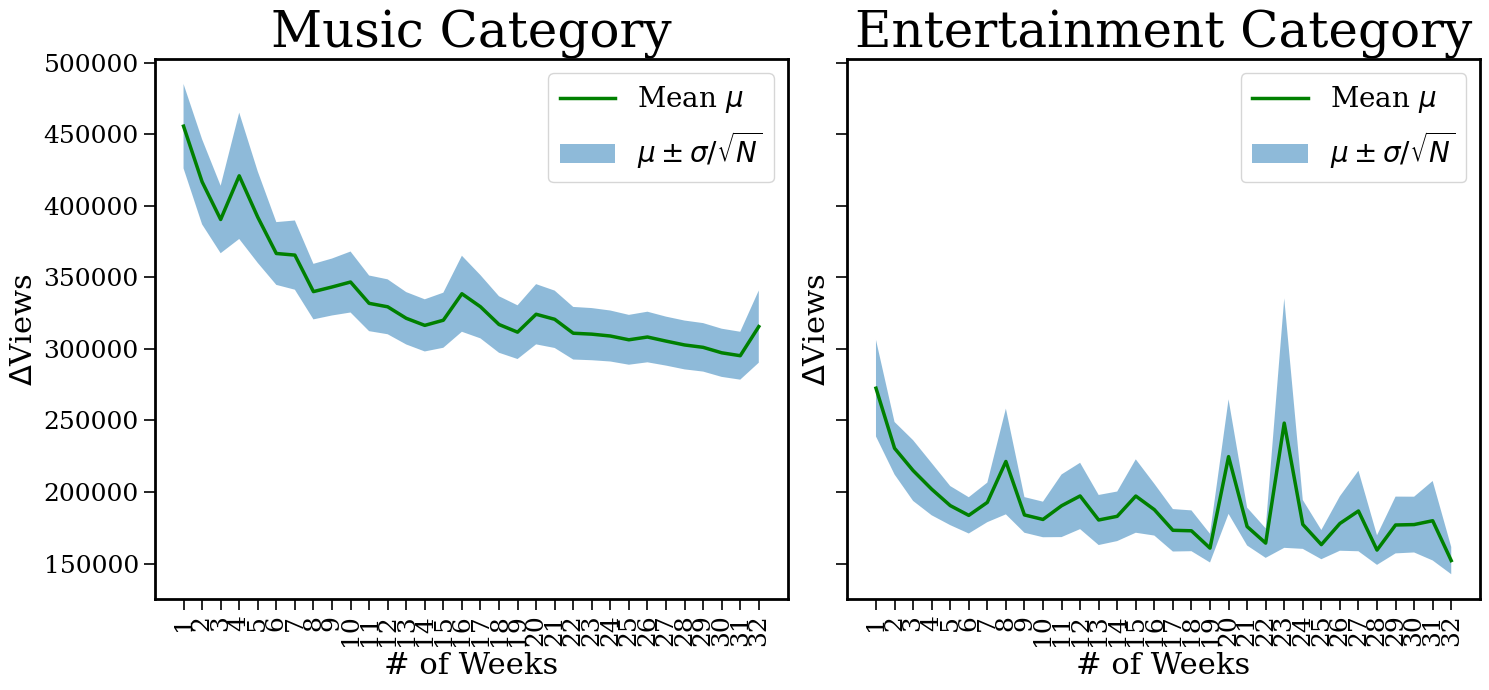

In [41]:
# Plot Delta_views Evolution for time periods 1 (4 weeks) to 8 months (32 weeks) following upload of a video
consistency_utils.plot_metric_values_all_weeks(df_delta_views_list)

In [ ]:
# Calculate return times for peaks that return to baseline for Music and Entertainment
mod_return_times_music = consistency_utils.modified_return_to_baseline_analysis(df_time_series_music, metric='delta_views', max_return_time=20, prom_percent=0.3, 
                                                                          baseline_window=4, tolerance=0.1)

mod_return_times_entertainment = consistency_utils.modified_return_to_baseline_analysis(df_time_series_entertainment, metric='delta_views', max_return_time=20, 
                                                                                  prom_percent=0.3, baseline_window=4, tolerance=0.1)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:489: RuntimeWarning: Mean of empty slice
  'avg_return_time': results_df['avg_return_time'].mean(),
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:489: RuntimeWarning: Mean of empty slice
  'avg_return_time': results_df['avg_return_time'].mean(),
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:489: RuntimeWarning: Mean of empty slice
  'avg_return_time': results_df['avg_return_time'].mean(),
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:489: RuntimeWarning: Mean of empty slice
  'avg_return_time': results_df['avg_return_time'].mean(),
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:489: RuntimeWarning: Mean of empty slice
  'avg_return_time': res

Music Average return time: 1.7083019709089997
Music Standard deviation of return time: 0.7024932013891928
Music propotion of return:  0.942756390819845
Entertainment Average return time: 1.6699418618270858
Entertainment Standard deviation of return time: 0.541270797414863
Entertainment propotion of return:  0.9400004509593661


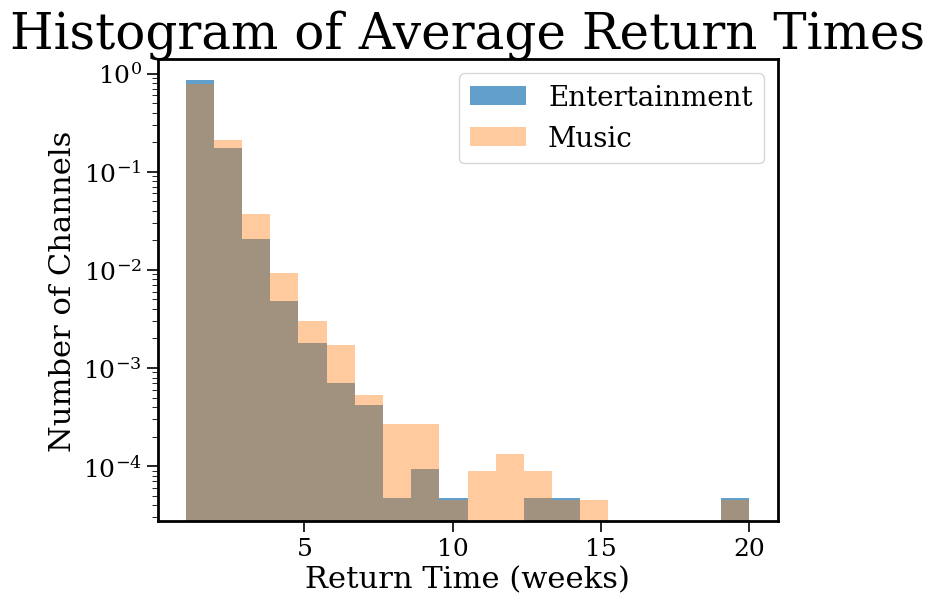

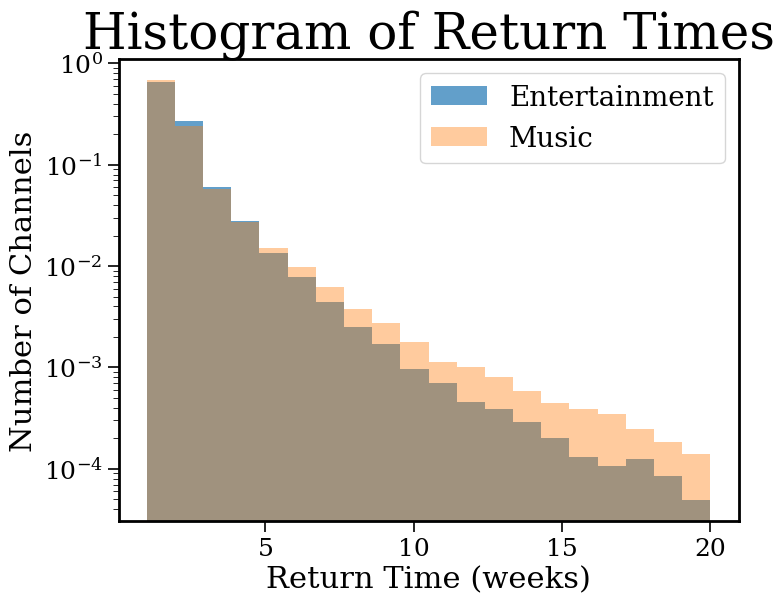

Number of Music Peaks: 209760
Number of Entertainment Peaks: 259085


In [251]:
# Plot results and Histograms for return times of peaks that return to baseline
consistency_utils.return_times_results_and_histograms(mod_return_times_music, mod_return_times_entertainment)

In [252]:
# Calculate decay rates between peaks that return to baseline for Music and Entertainment
mod_music_decay_rates = consistency_utils.modified_calculate_decay_rates_between_peaks(df_time_series_music, metric='delta_views', baseline_window=4, 
                                                                                 prom_percent=0.3, tolerance=0.1)
mod_ent_decay_rates = consistency_utils.modified_calculate_decay_rates_between_peaks(df_time_series_entertainment, metric='delta_views', baseline_window=4, 
                                                                               prom_percent=0.3, tolerance=0.1)

Music Average Decay Rate: 0.13030235920944733
Music Standard deviation of Decay Rate: 0.11147945918320896
Number of Peaks for Music: 21386
Entertainment Average Decay Rate: 0.16229298595975422
Entertainment Standard deviation of Decay Rate: 0.11989903914971767
Number of Peaks for Entertainment: 25922


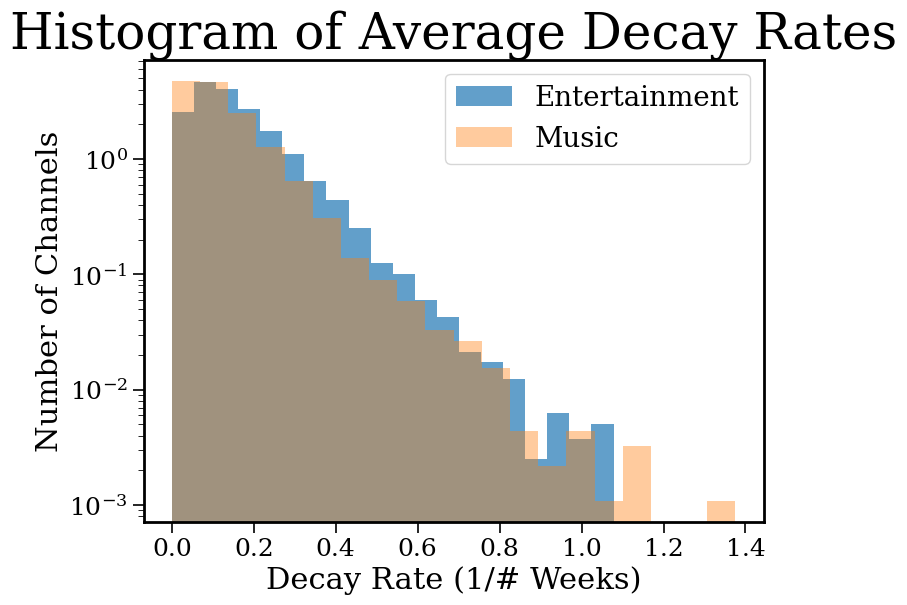

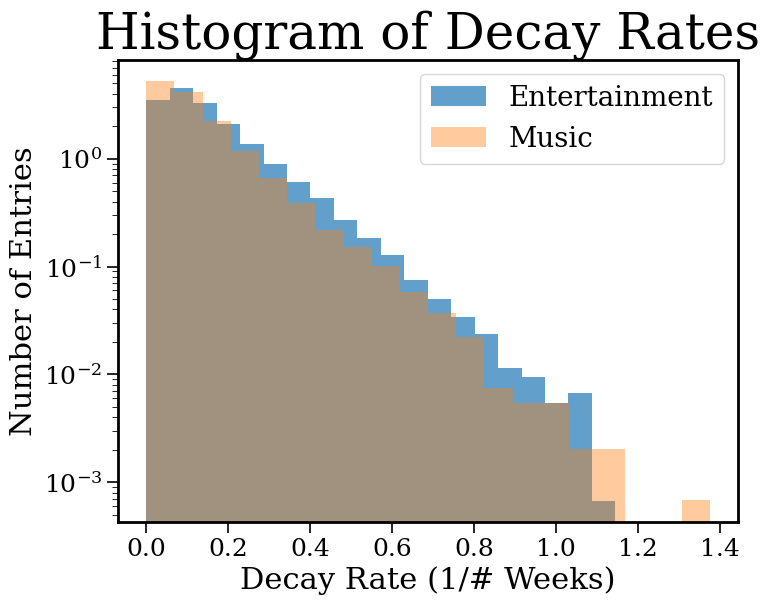

In [253]:
# Plot results and histograms of decay rates between peaks that return to baseline for Music and Entertainment
consistency_utils.decay_rates_results_and_histograms(mod_music_decay_rates, mod_ent_decay_rates)

In [193]:
# Calculate peak heights for Music and Entertainment
music_peaks = consistency_utils.calculate_peak_heights_baseline(df_time_series_music, metric='delta_views', baseline_window=4, prom_percent=0.3)
ent_peaks = consistency_utils.calculate_peak_heights_baseline(df_time_series_entertainment, metric='delta_views', baseline_window=4, prom_percent=0.3)

Number of Peaks for Music: 205280
Number of Peaks for Entertainment: 253841


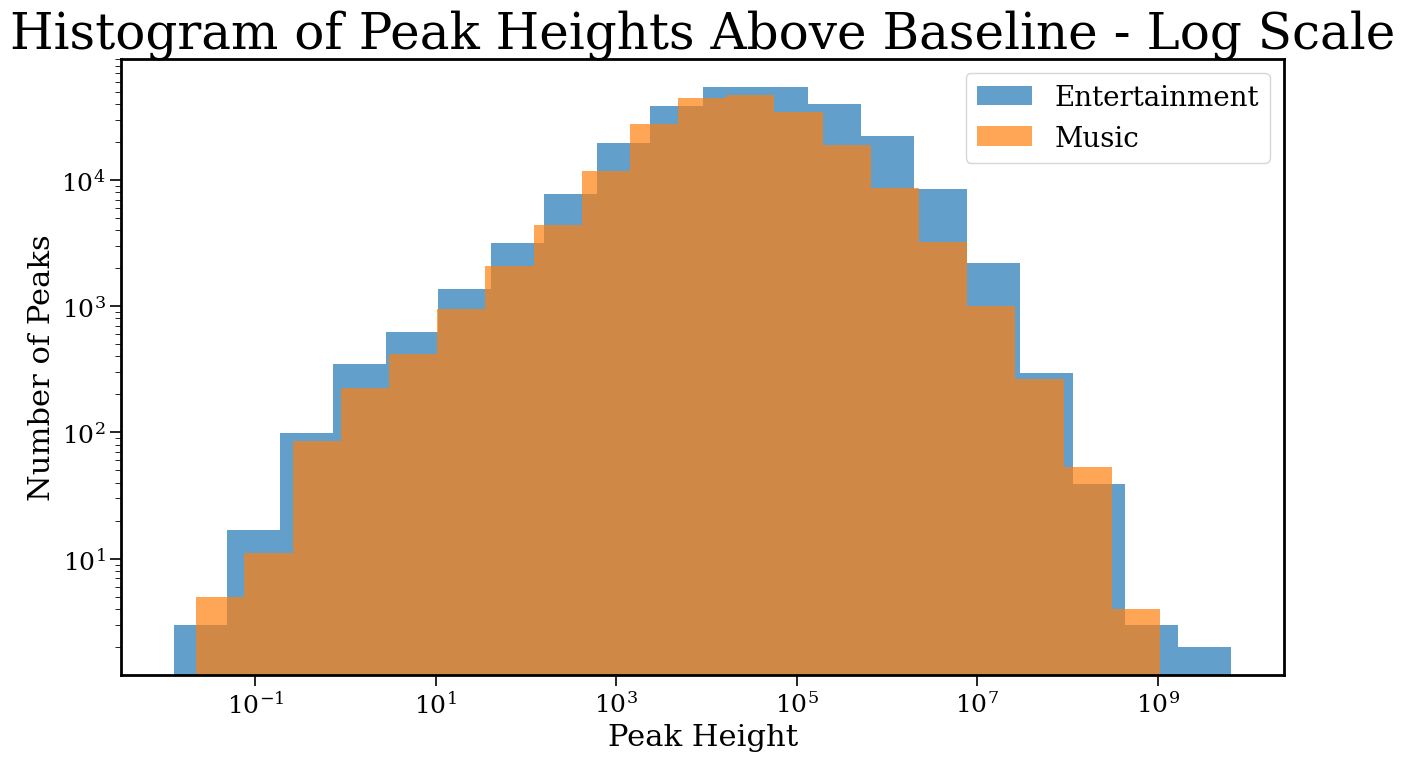

In [194]:
# Plot Histogram of peak heights
consistency_utils.peak_heights_histogram(music_peaks, ent_peaks)

## Repeat Analysis for Top Channels

In [45]:
# Load channels DataFrame
df_channels = df_channels = pd.read_csv(f"{DATA_PATH}/channels.tsv.gz", sep="\t", compression="gzip")
print(len(df_channels))
df_channels.head()

136470


category_cc   join_date                   channel  \
0         Gaming  2010-04-29  UC-lHJZR3Gqxm24_Vd_AJ5Yw   
1      Education  2006-09-01  UCbCmjCuTUZos6Inko4u57UQ   
2  Entertainment  2006-09-20  UCpEhnqL0y41EpW2TvWAHD7Q   
3  Howto & Style  2016-11-15  UC295-Dw_tDNtZXFeAPAW6Aw   
4         Sports  2007-05-11  UCJ5v_MCY6GNUBTO8-D3XoAg   

                   name_cc  subscribers_cc  videos_cc  subscriber_rank_sb  \
0                PewDiePie       101000000       3956                 3.0   
1  Cocomelon - Nursery ...        60100000        458                 7.0   
2                SET India        56018869      32661                 8.0   
3          5-Minute Crafts        60600000       3591                 9.0   
4                      WWE        48400000      43421                11.0   

   weights  
0    2.087  
1    2.087  
2    2.087  
3    2.087  
4    2.087

In [ ]:
# Filtered Music and Entertainment DataFrames
df_filtered_music, df_filtered_entertainment = consistency_utils.filter_and_categorize(df_channels, df_time_series, p_threshold=0.75, top=True)

In [ ]:
# Basic stats for filtered time-series DataFrames for Music and Entertainment categories
# Music
consistency_utils.basic_stats(df_filtered_music, category='Music')

# Entertainment
consistency_utils.basic_stats(df_filtered_entertainment, category='Entertainment')

Number of entries for Music category: 269598
Number of entries for Music with delta_videos >= 1: 102420       (37.99% of total)
Number of entries for Entertainment category: 360801
Number of entries for Entertainment with delta_videos >= 1: 231099       (64.05% of total)


c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


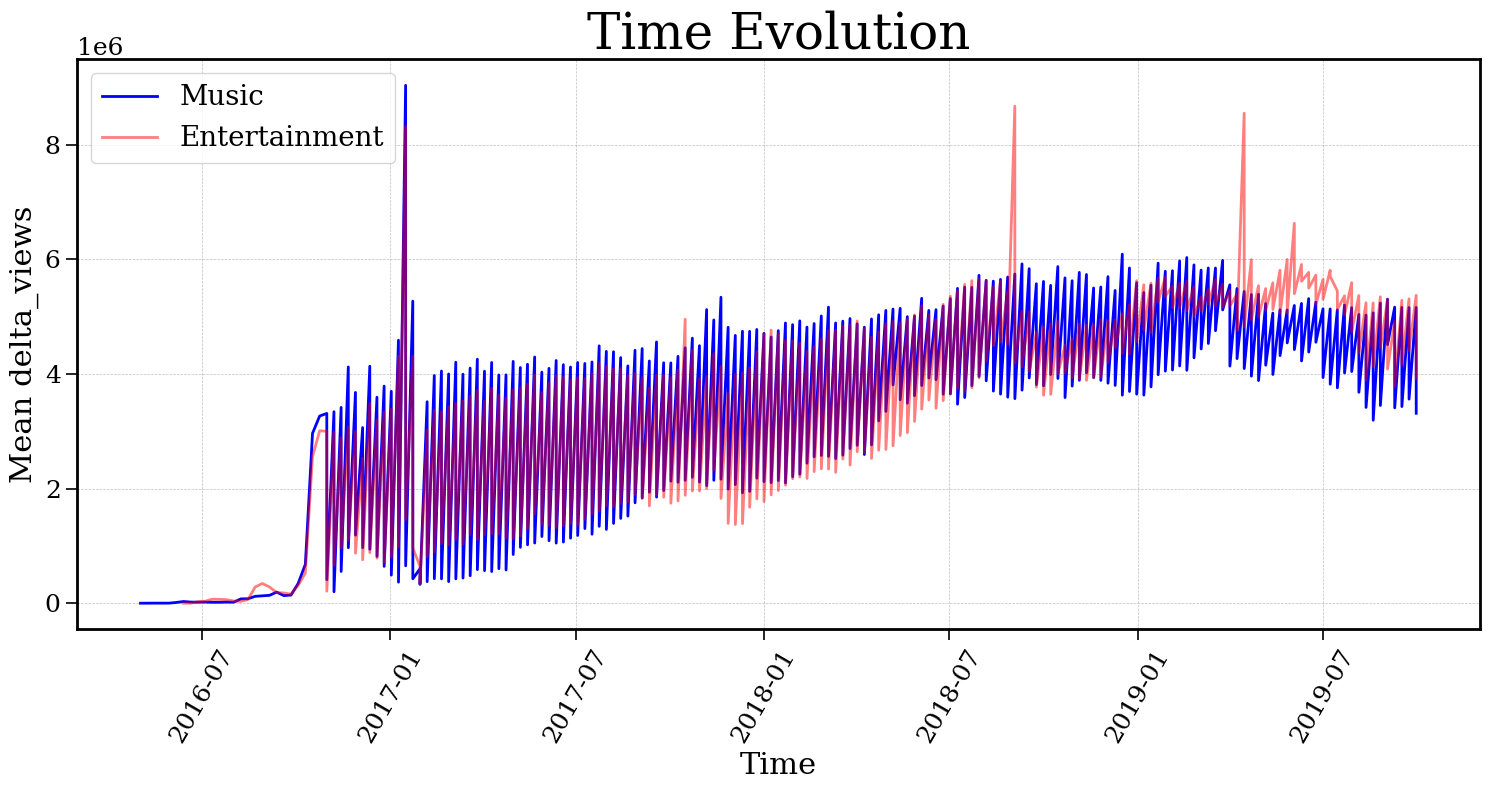

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


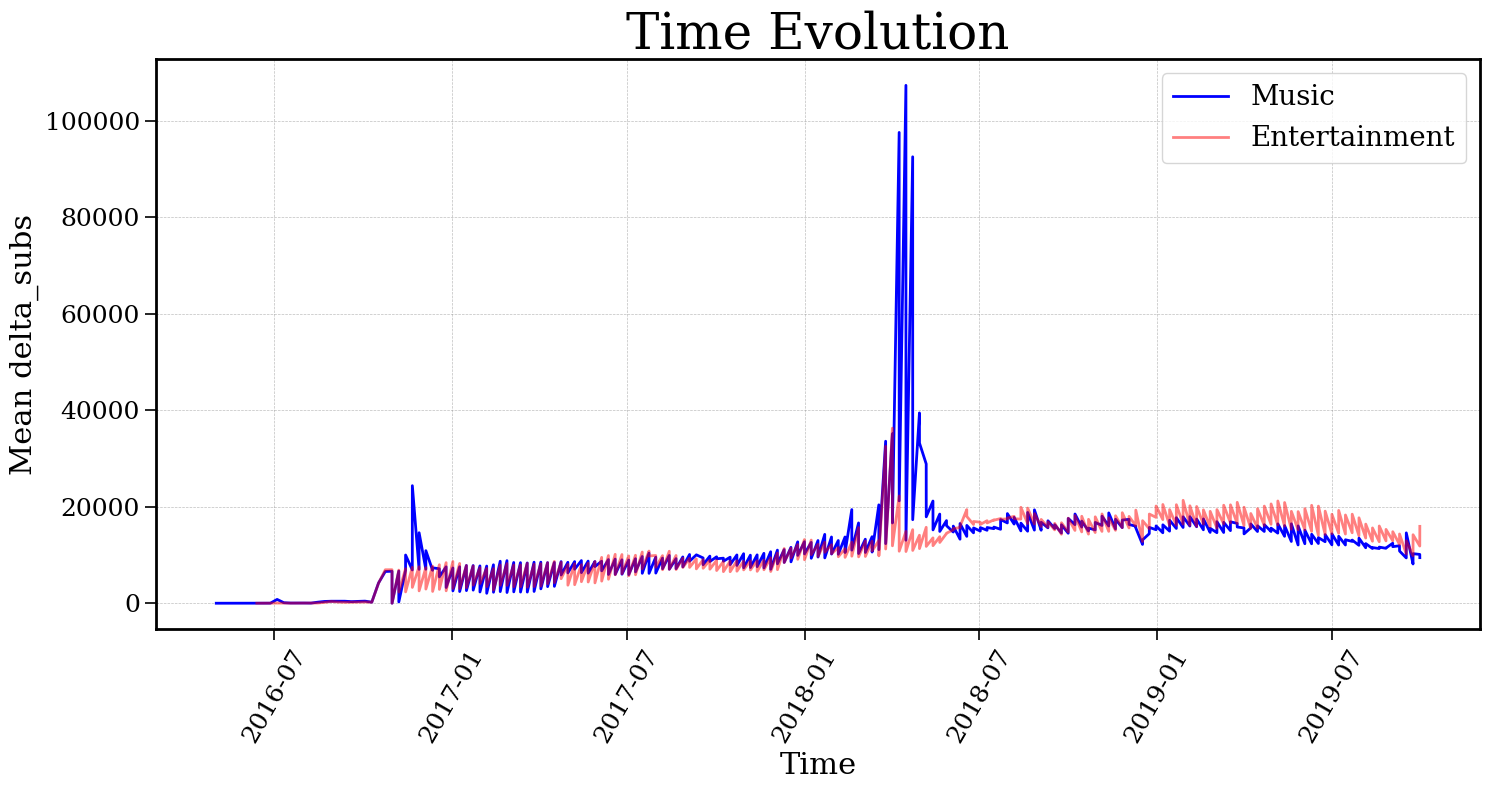

In [64]:
# Time Evolution of delta_views mean
consistency_utils.plot_general_mean(df_filtered_music, df_filtered_entertainment, metric='delta_views')

# Time Evolution of delta_subs mean
consistency_utils.plot_general_mean(df_filtered_music, df_filtered_entertainment, metric='delta_subs')

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


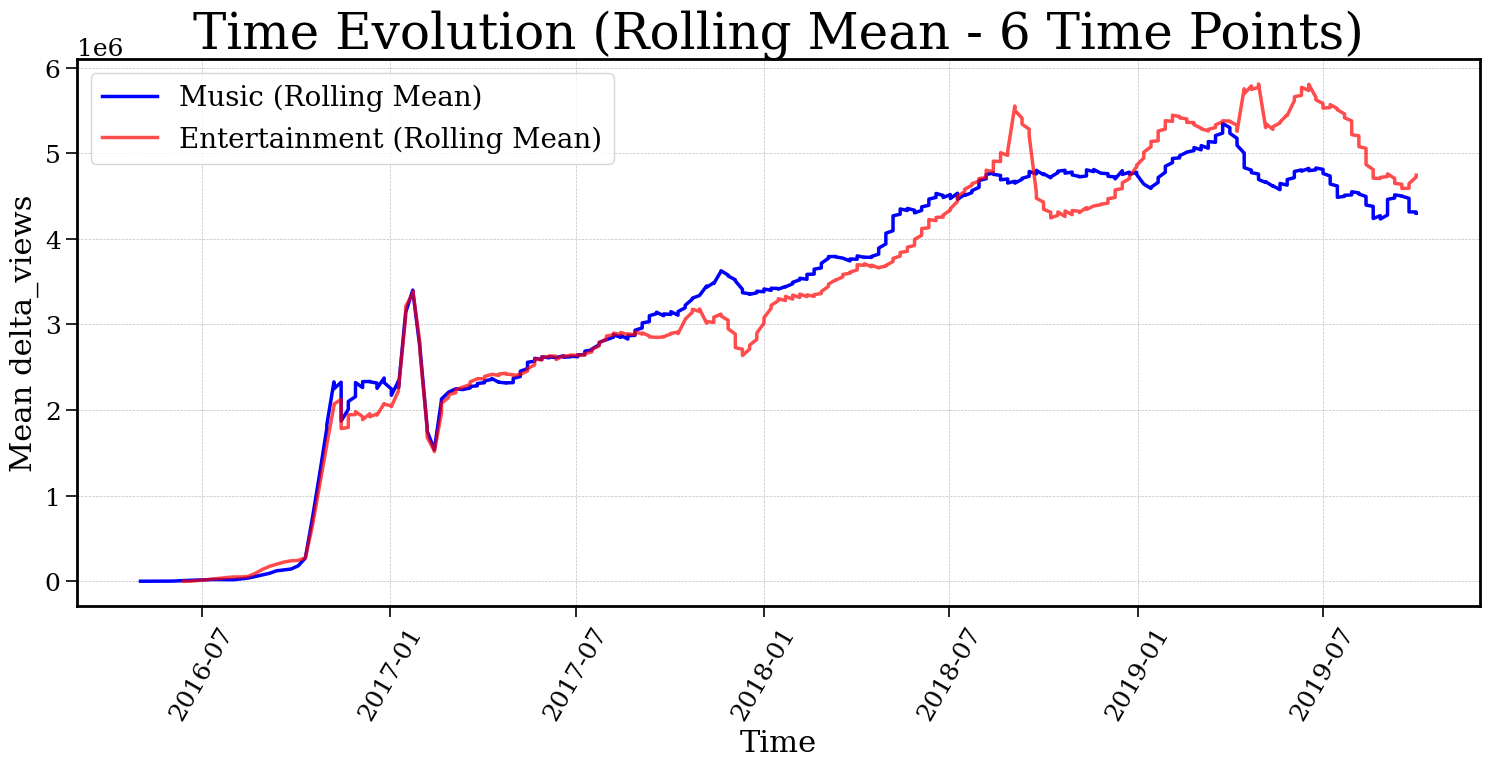

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


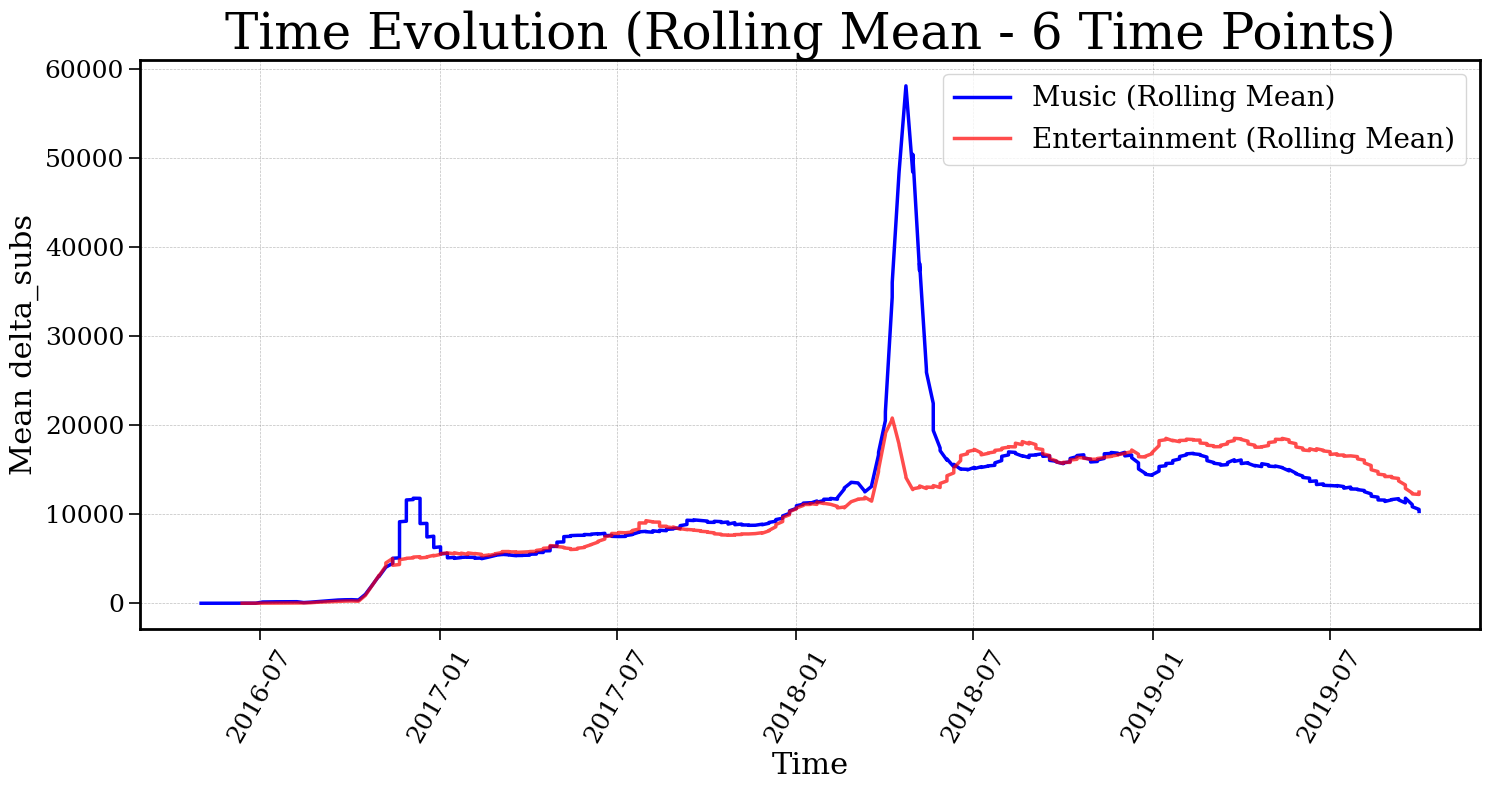

In [65]:
# Rolling average of time evolution of delta_views mean
consistency_utils.plot_general_rolling_mean(df_filtered_music, df_filtered_entertainment, metric='delta_views', rolling_window=6)

# Rolling average of time evolution of delta_subs mean
consistency_utils.plot_general_rolling_mean(df_filtered_music, df_filtered_entertainment, metric='delta_subs', rolling_window=6)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


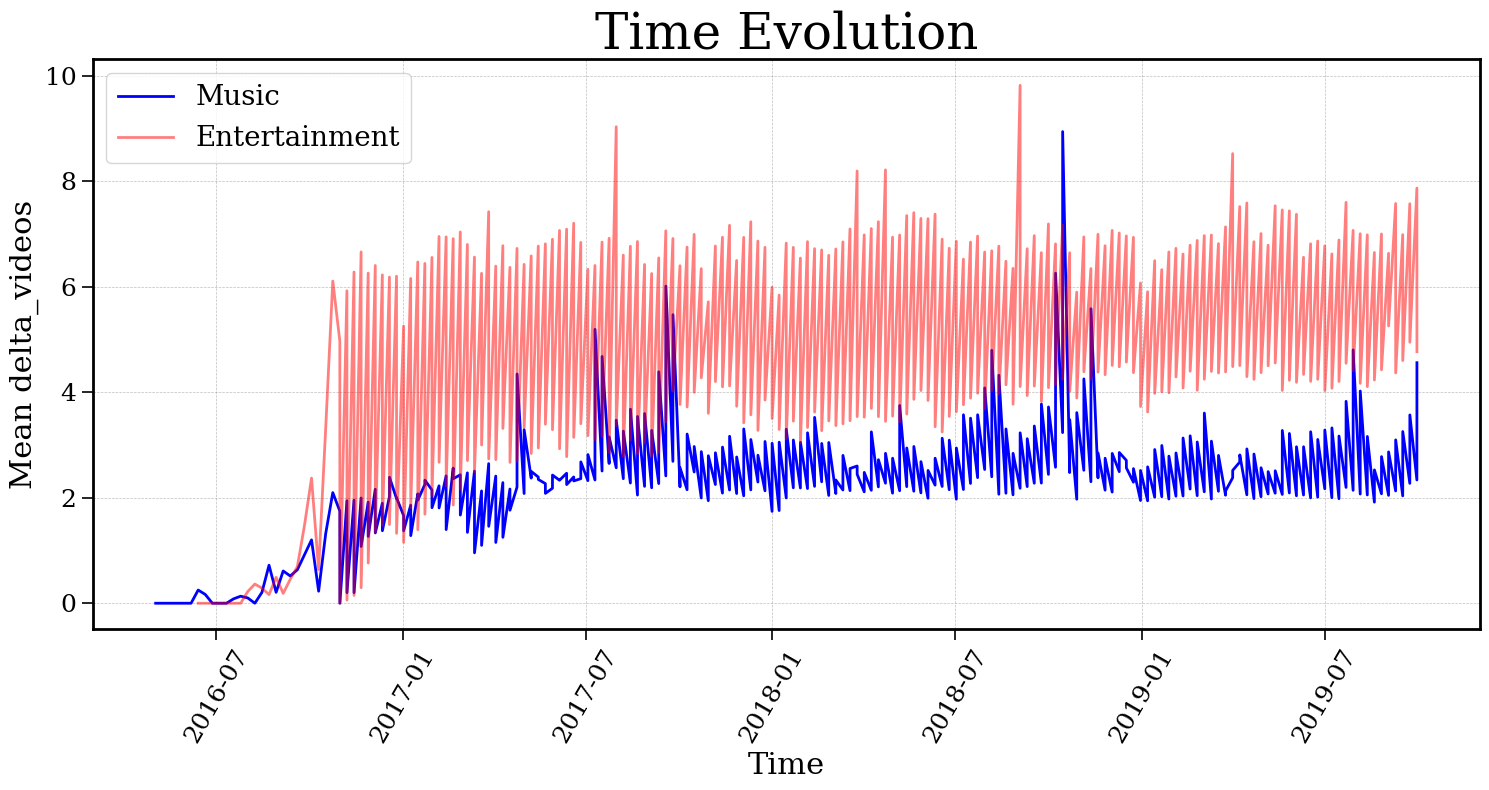

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


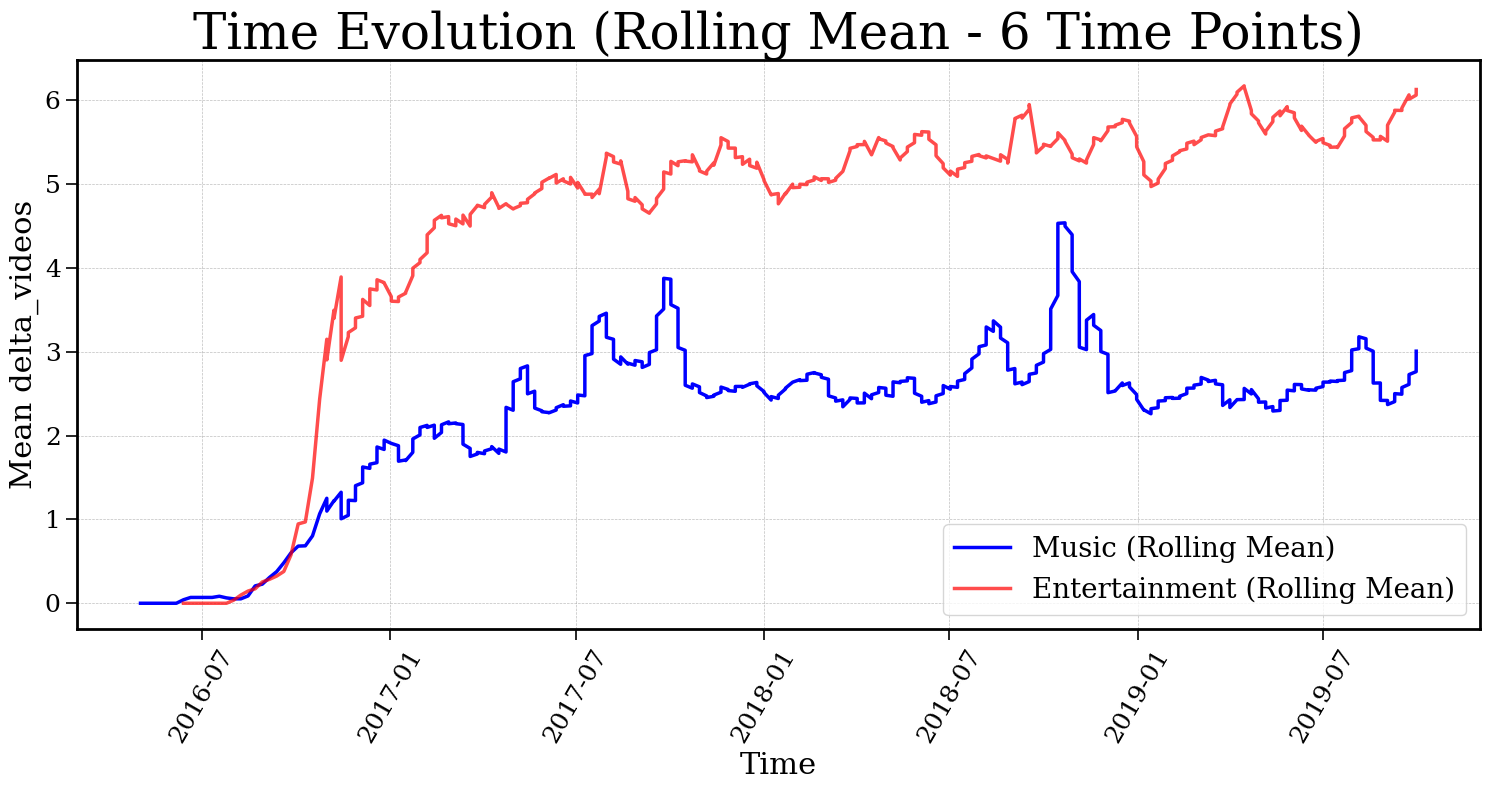

In [66]:
# Time Evolution of delta_videos mean
consistency_utils.plot_general_mean(df_filtered_music, df_filtered_entertainment, metric='delta_videos')

# Rolling average of time Evolution of delta_videos mean
consistency_utils.plot_general_rolling_mean(df_filtered_music, df_filtered_entertainment, metric='delta_videos', rolling_window=6)

In [67]:
# Calculate Delta_views Evolution for time periods 1 (4 weeks) to 8 months (32 weeks) following upload of a video
weeks = [4, 8, 12, 16, 20, 24, 28, 32]
df_delta_views_list = consistency_utils.calculate_metric_values_all_weeks(df_filtered_music, df_filtered_entertainment, weeks=weeks, metric='delta_views')

Number of initial video entries for n_weeks = 4: 40141
Number of valid entries for n_weeks = 4: 7001
Number of initial video entries for n_weeks = 4: 70392
Number of valid entries for n_weeks = 4: 4731
Number of initial video entries for n_weeks = 8: 40141
Number of valid entries for n_weeks = 8: 3471
Number of initial video entries for n_weeks = 8: 70392
Number of valid entries for n_weeks = 8: 1948
Number of initial video entries for n_weeks = 12: 40141
Number of valid entries for n_weeks = 12: 2216
Number of initial video entries for n_weeks = 12: 70392
Number of valid entries for n_weeks = 12: 1150
Number of initial video entries for n_weeks = 16: 40141
Number of valid entries for n_weeks = 16: 1515
Number of initial video entries for n_weeks = 16: 70392
Number of valid entries for n_weeks = 16: 781
Number of initial video entries for n_weeks = 20: 40141
Number of valid entries for n_weeks = 20: 1150
Number of initial video entries for n_weeks = 20: 70392
Number of valid entries fo

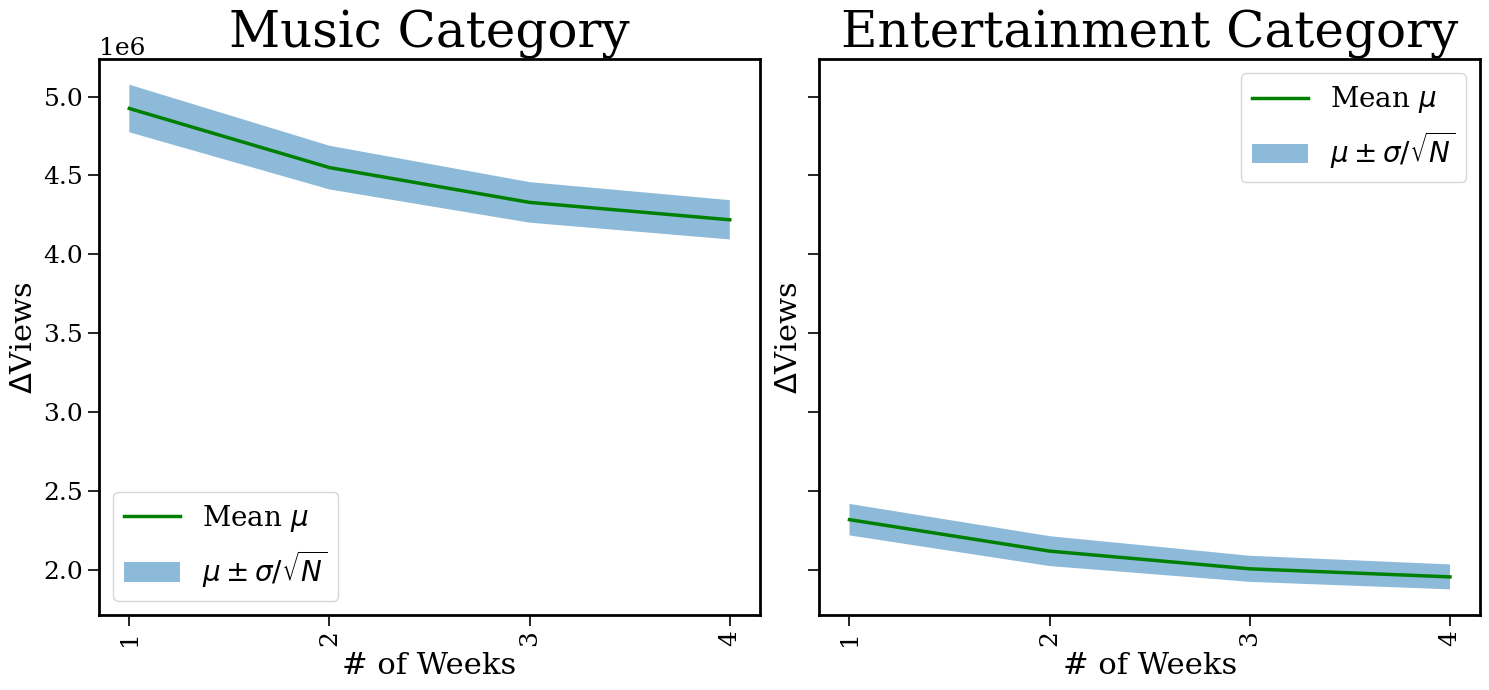

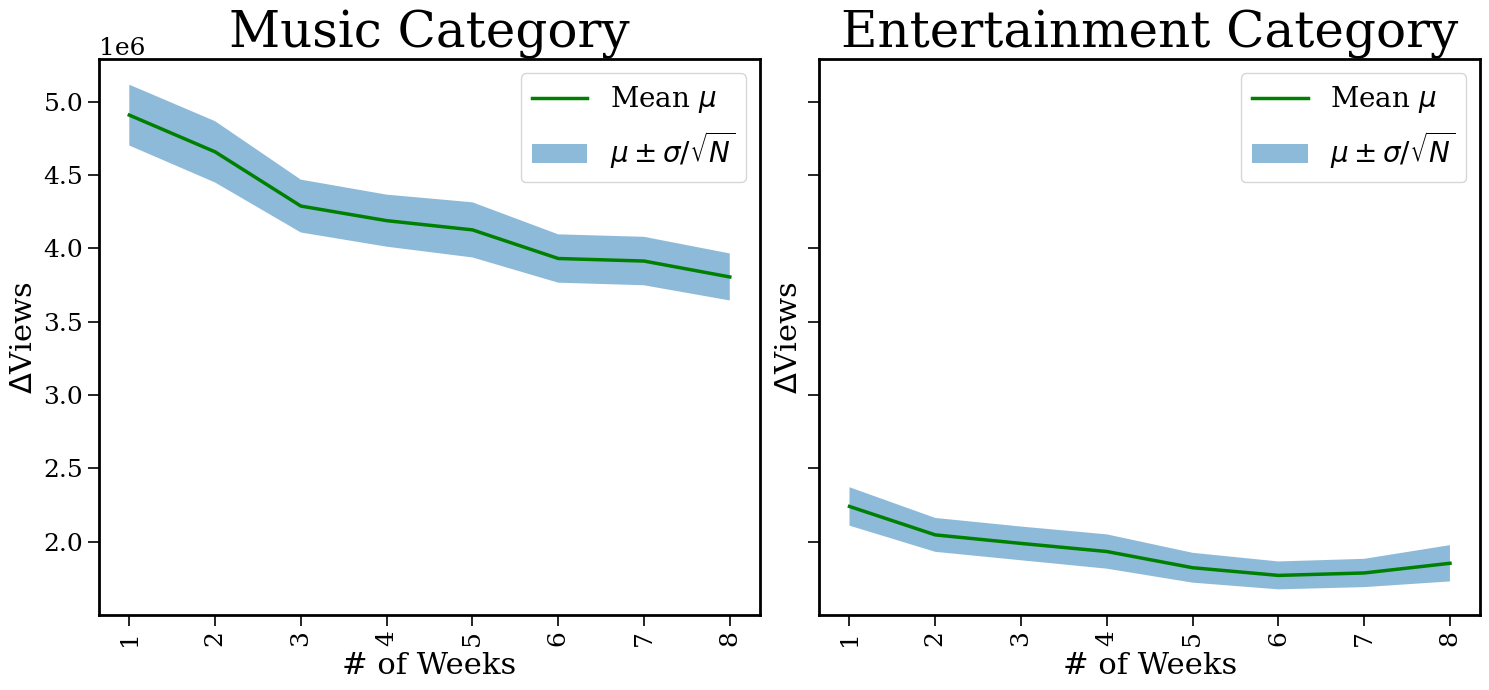

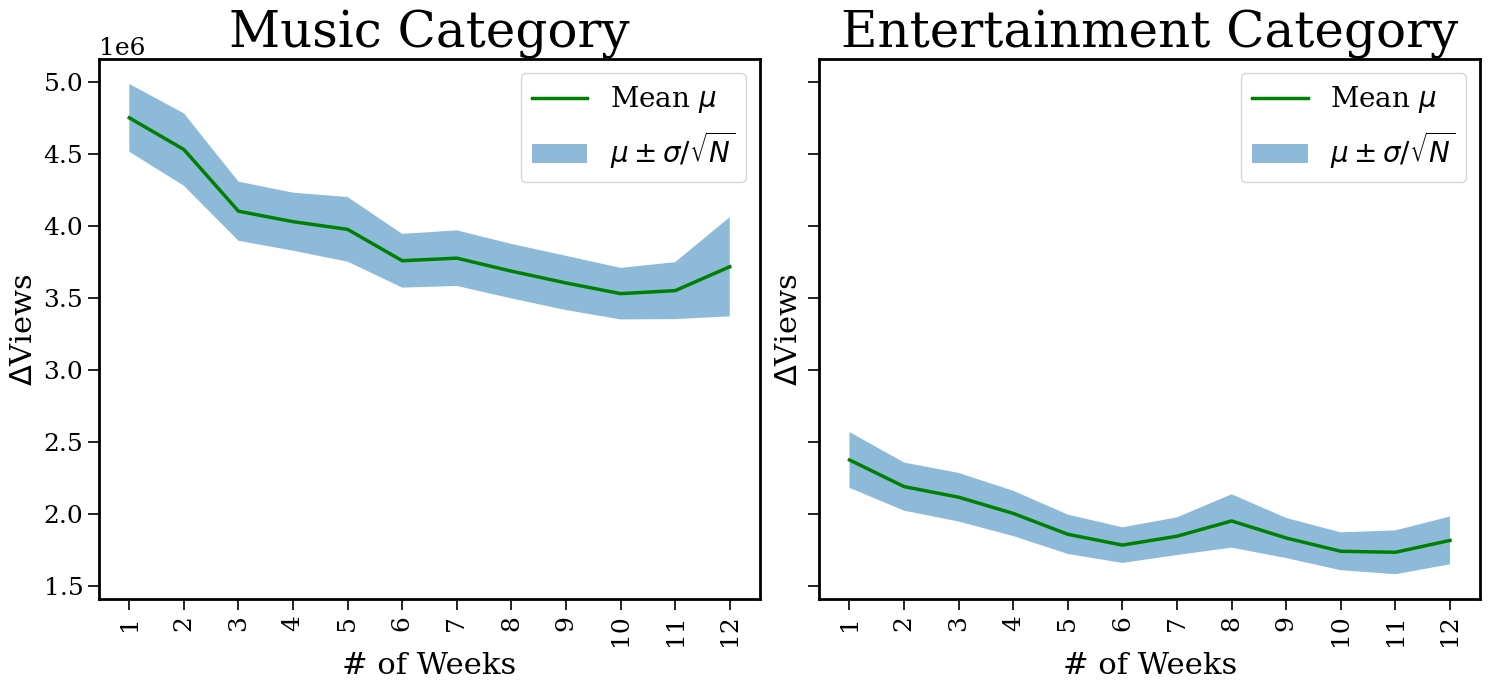

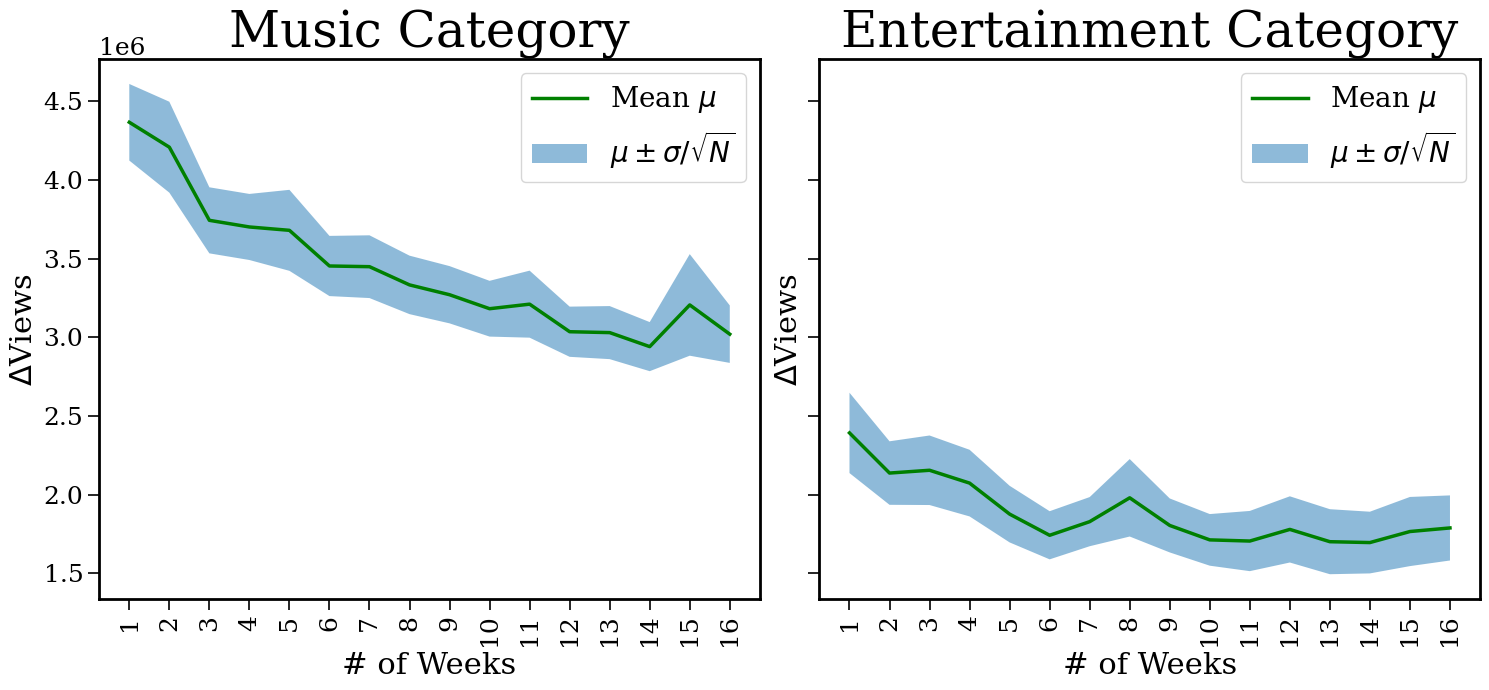

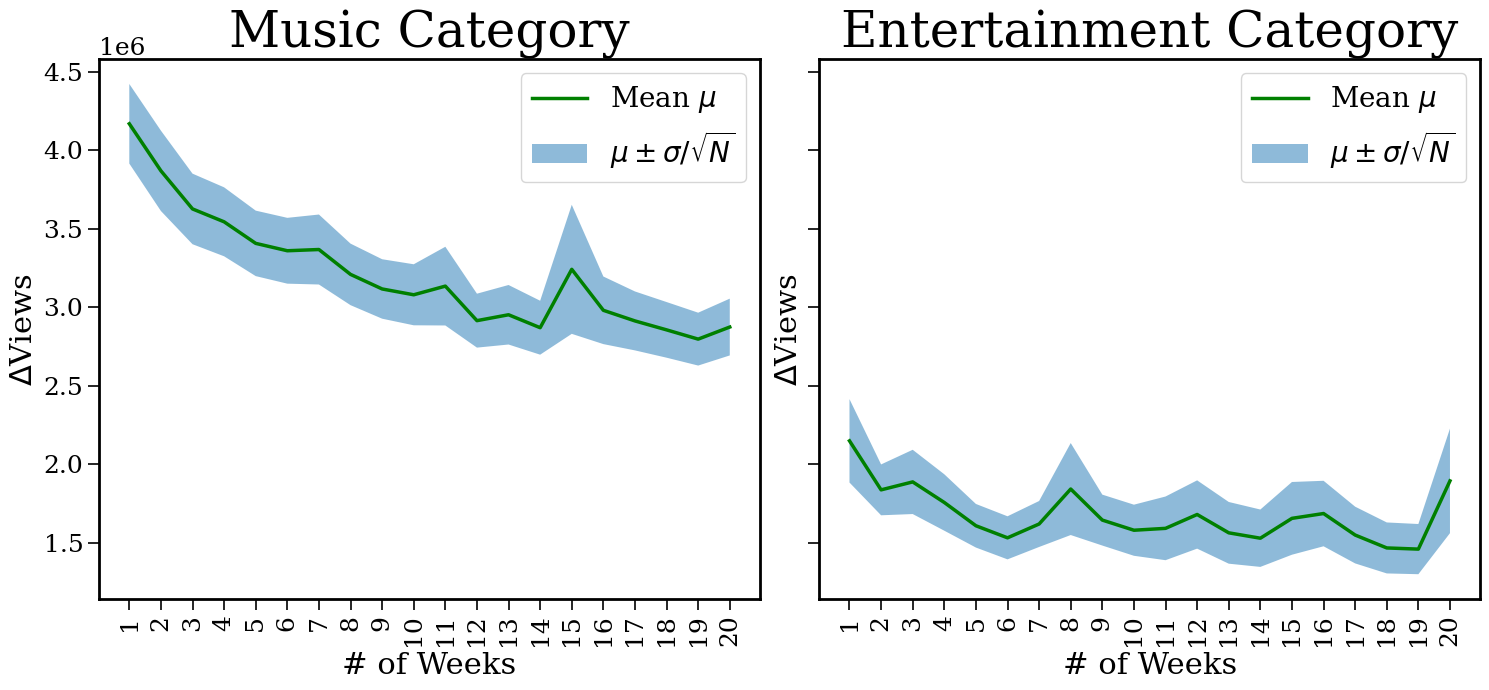

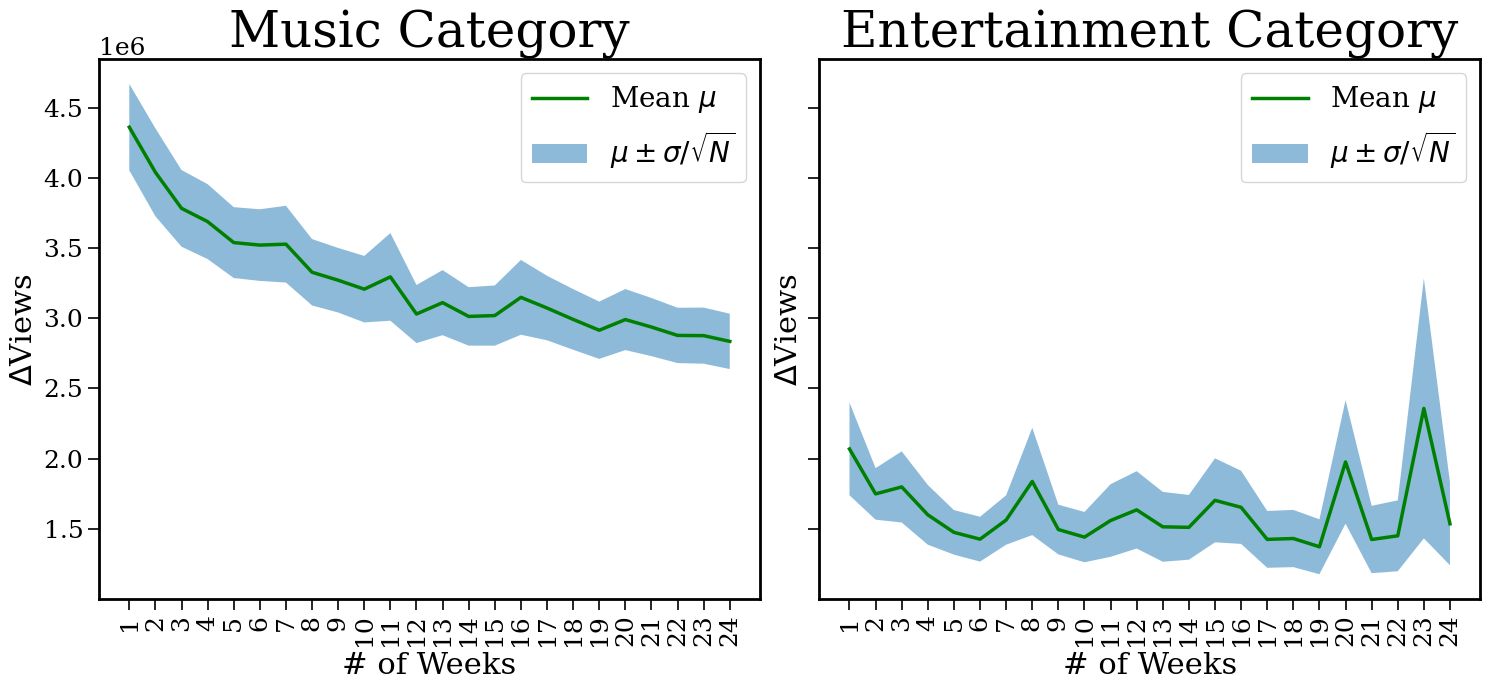

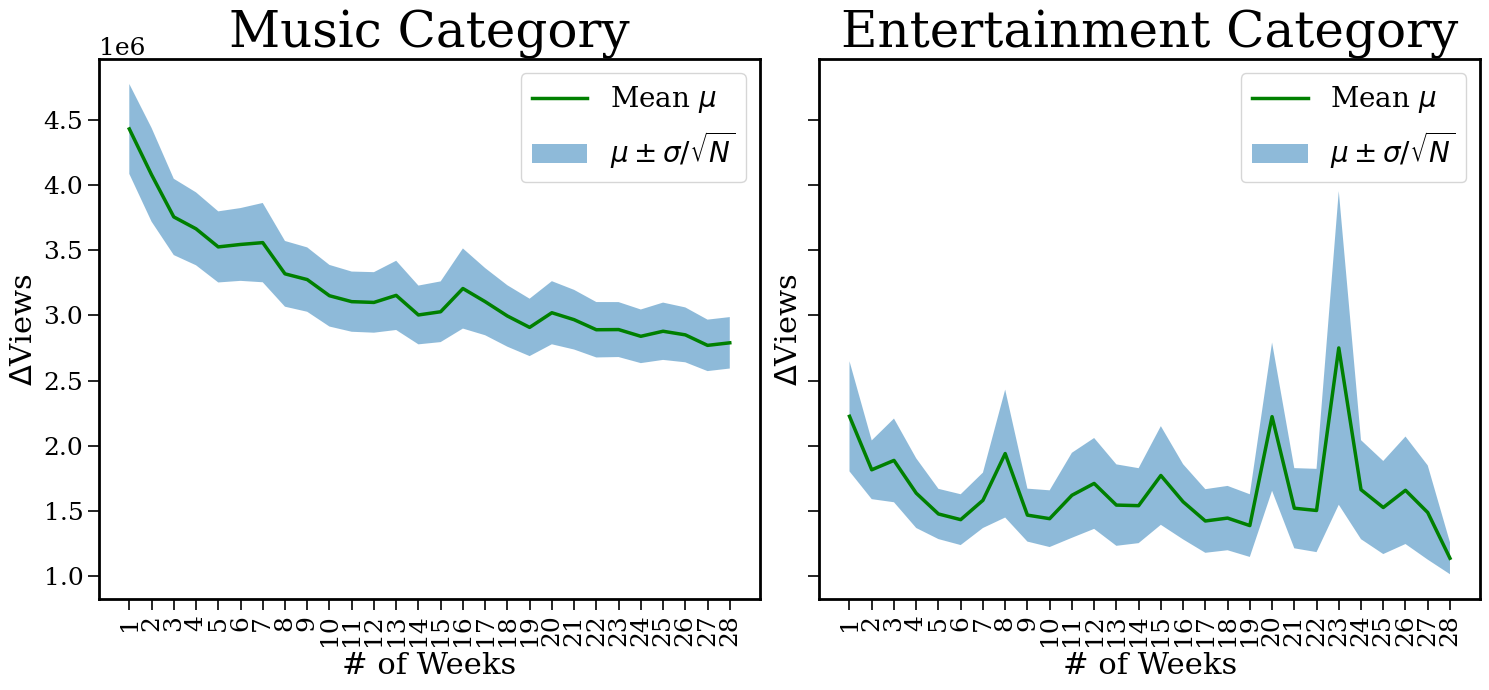

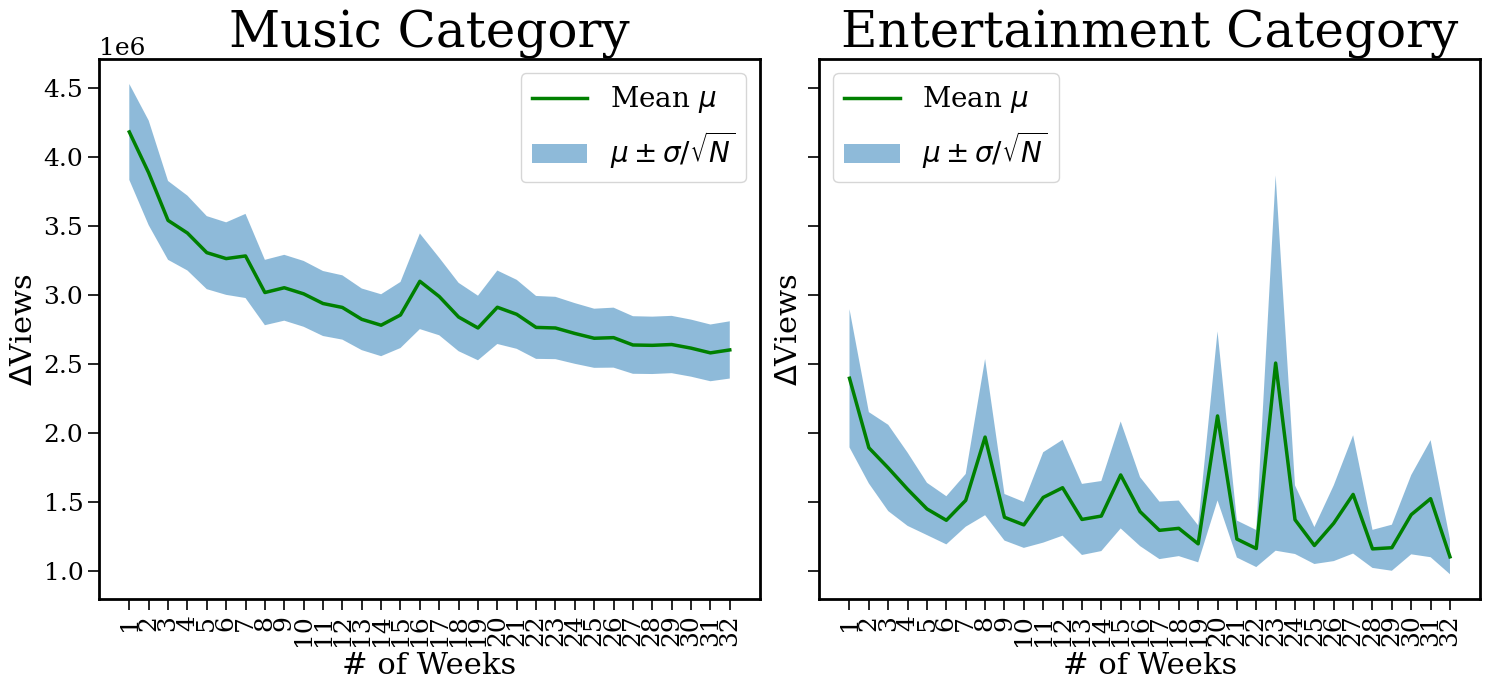

In [68]:
# Plot Delta_views Evolution for time periods 1 (4 weeks) to 8 months (32 weeks) following upload of a video
consistency_utils.plot_metric_values_all_weeks(df_delta_views_list)

In [236]:
# Calculate return times for Music and Entertainment
return_times_music_filtered = consistency_utils.return_to_baseline_analysis(df_filtered_music, metric='delta_views', max_return_time=20, 
                                                                      tolerance=0.1, prom_percent=0.3)
return_times_entertainment_filtered = consistency_utils.return_to_baseline_analysis(df_filtered_entertainment, metric='delta_views', max_return_time=20, 
                                                                              tolerance=0.1, prom_percent=0.3)

Music Average return time: 1.8877337142877089
Music Standard deviation of return time: 0.73268483247036
Music propotion of return:  0.9778664189313915
Entertainment Average return time: 1.8903619951276804
Entertainment Standard deviation of return time: 0.6121905539720058
Entertainment propotion of return:  0.9731697892560854


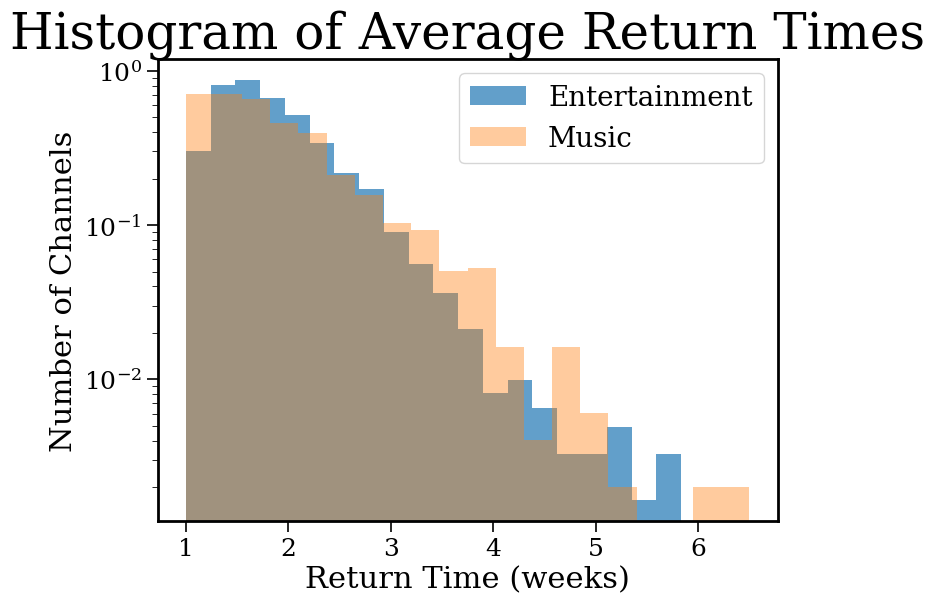

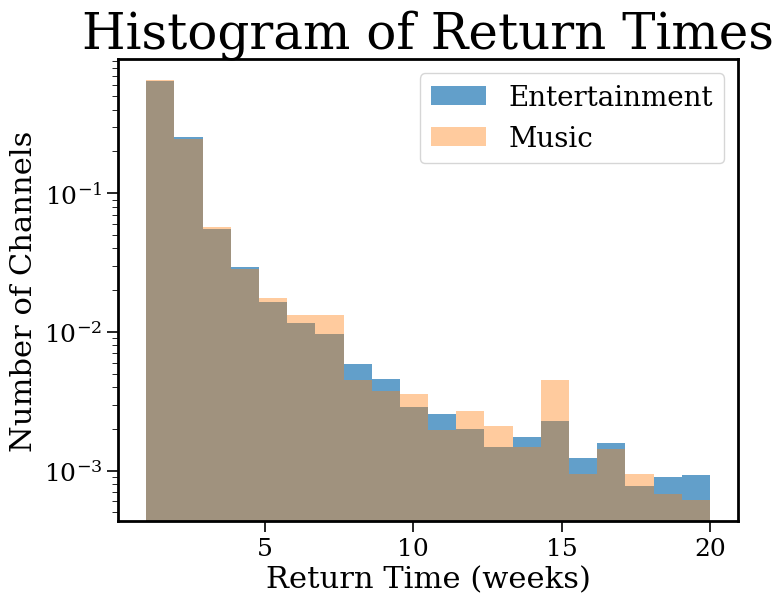

Number of Music Peaks: 15524
Number of Entertainment Peaks: 33871


In [237]:
# Plot results and Histograms for return times 
consistency_utils.return_times_results_and_histograms(return_times_music_filtered, return_times_entertainment_filtered)

In [238]:
# Calculate return times for peaks that return to baseline for Music and Entertainment
mod_return_times_music_filtered = consistency_utils.modified_return_to_baseline_analysis(df_filtered_music, metric='delta_views', max_return_time=20, 
                                                                                   tolerance=0.1, prom_percent=0.3)
mod_return_times_entertainment_filtered = consistency_utils.modified_return_to_baseline_analysis(df_filtered_entertainment, metric='delta_views', max_return_time=20, 
                                                                                           tolerance=0.2, prom_percent=0.3)

Music Average return time: 1.7049366542042372
Music Standard deviation of return time: 0.5903884500634001
Music propotion of return:  0.9585405274482875
Entertainment Average return time: 1.3999573418343387
Entertainment Standard deviation of return time: 0.3670152669779957
Entertainment propotion of return:  0.959065768510519


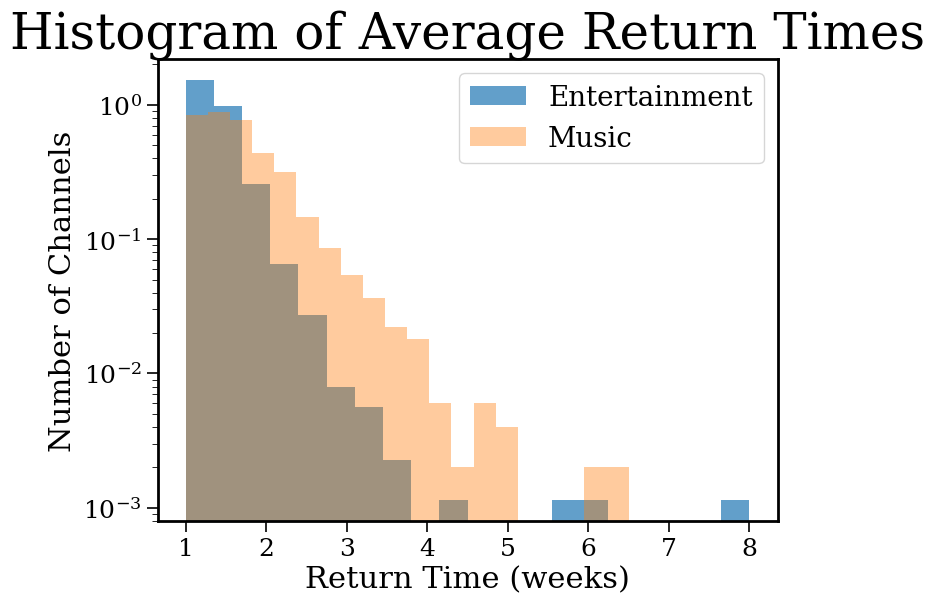

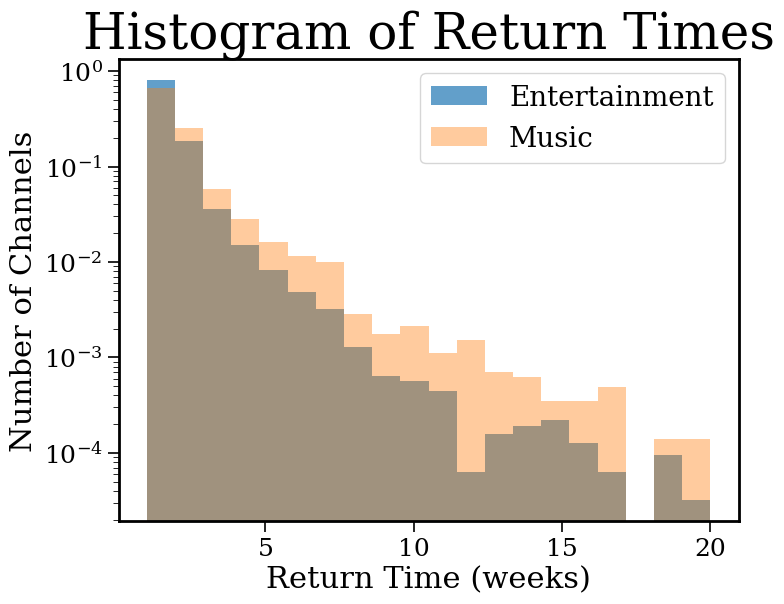

Number of Music Peaks: 15142
Number of Entertainment Peaks: 33253


In [239]:
# Plot results and Histograms for return times of peaks that return to baseline
consistency_utils.return_times_results_and_histograms(mod_return_times_music_filtered, mod_return_times_entertainment_filtered)

In [73]:
# Calculate decay rates between peaks for Music and Entertainment
music_decay_rates_filtered = consistency_utils.calculate_decay_rates_between_peaks(df_filtered_music, metric='delta_views')
ent_decay_rates_filtered = consistency_utils.calculate_decay_rates_between_peaks(df_filtered_entertainment, metric='delta_views')

Music Average Decay Rate: 0.04372975273345228
Music Standard deviation of Decay Rate: 0.0404584999003431
Number of Peaks for Music: 32326
Entertainment Average Decay Rate: 0.0745756334024196
Entertainment Standard deviation of Decay Rate: 0.06095584695218726
Number of Peaks for Entertainment: 42880


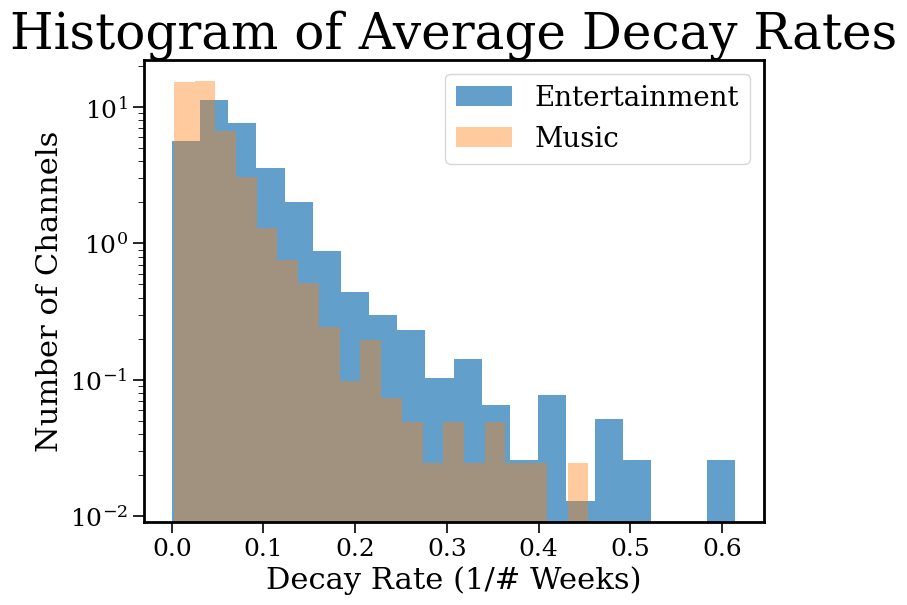

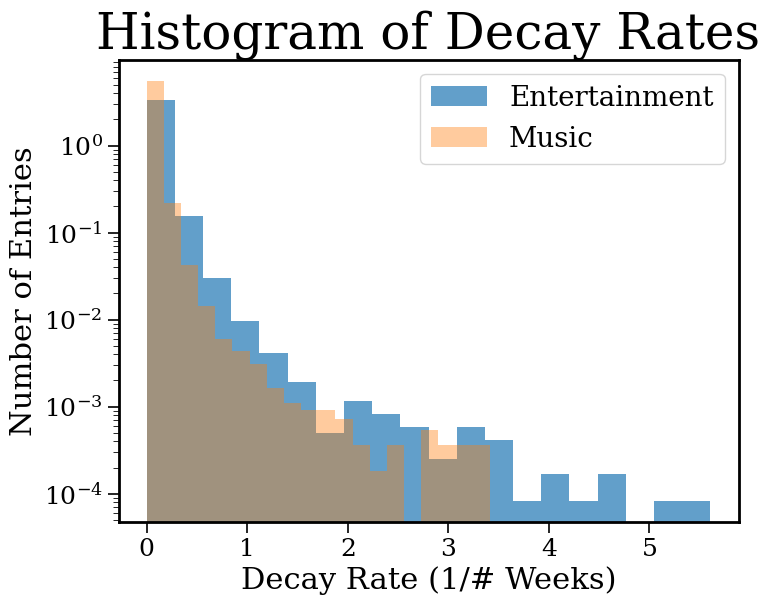

In [74]:
# Plot results and histograms of decay rates between peaks for Music and Entertainment
consistency_utils.decay_rates_results_and_histograms(music_decay_rates_filtered, ent_decay_rates_filtered)

In [240]:
# Calculate decay rates between peaks that return to baseline for Music and Entertainment
mod_music_decay_rates_filtered = consistency_utils.modified_calculate_decay_rates_between_peaks(df_filtered_music, metric='delta_views', baseline_window=4, 
                                                                                          tolerance=0.1, prom_percent=0.3)
mod_ent_decay_rates_filtered = consistency_utils.modified_calculate_decay_rates_between_peaks(df_filtered_entertainment, metric='delta_views', baseline_window=4, 
                                                                                        tolerance=0.1, prom_percent=0.3)

Music Average Decay Rate: 0.1207587140067044
Music Standard deviation of Decay Rate: 0.10152804160417789
Number of Peaks for Music: 1662
Entertainment Average Decay Rate: 0.142762605303374
Entertainment Standard deviation of Decay Rate: 0.09997753656999697
Number of Peaks for Entertainment: 3156


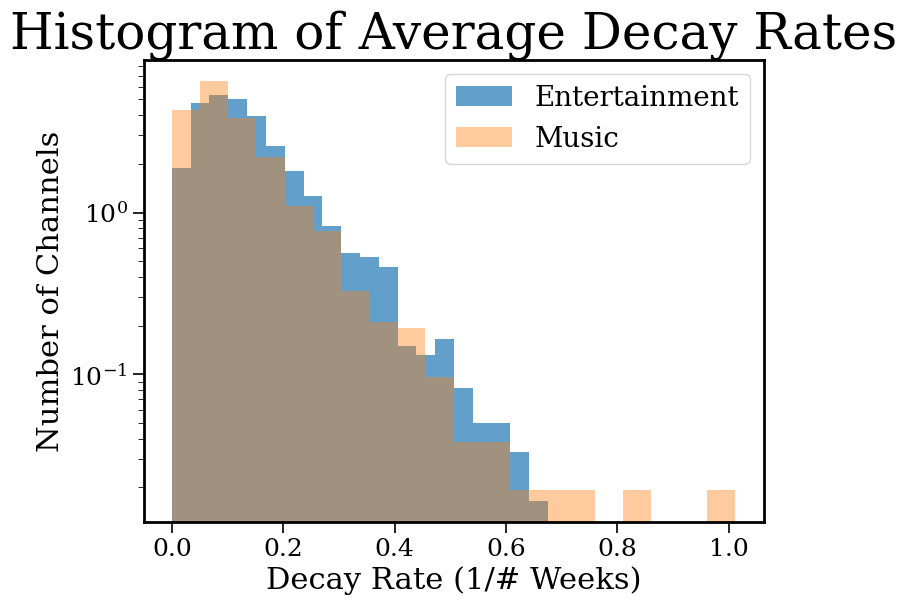

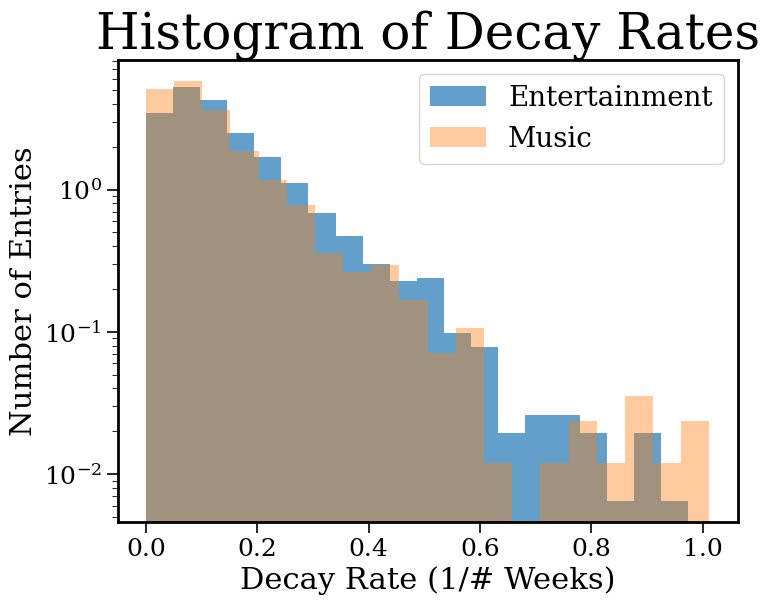

In [241]:
# Plot results and histograms of decay rates between peaks that return to baseline for Music and Entertainment
consistency_utils.decay_rates_results_and_histograms(mod_music_decay_rates_filtered, mod_ent_decay_rates_filtered)

In [246]:
# Calculate peak heights for Music and Entertainment
music_peaks_filtered = consistency_utils.calculate_peak_heights_baseline(df_filtered_music, metric='delta_views', baseline_window=4, prom_percent=0.3)
ent_peaks_filtered = consistency_utils.calculate_peak_heights_baseline(df_filtered_entertainment, metric='delta_views', baseline_window=4, prom_percent=0.3)

Number of Peaks for Music: 14793
Number of Peaks for Entertainment: 32386


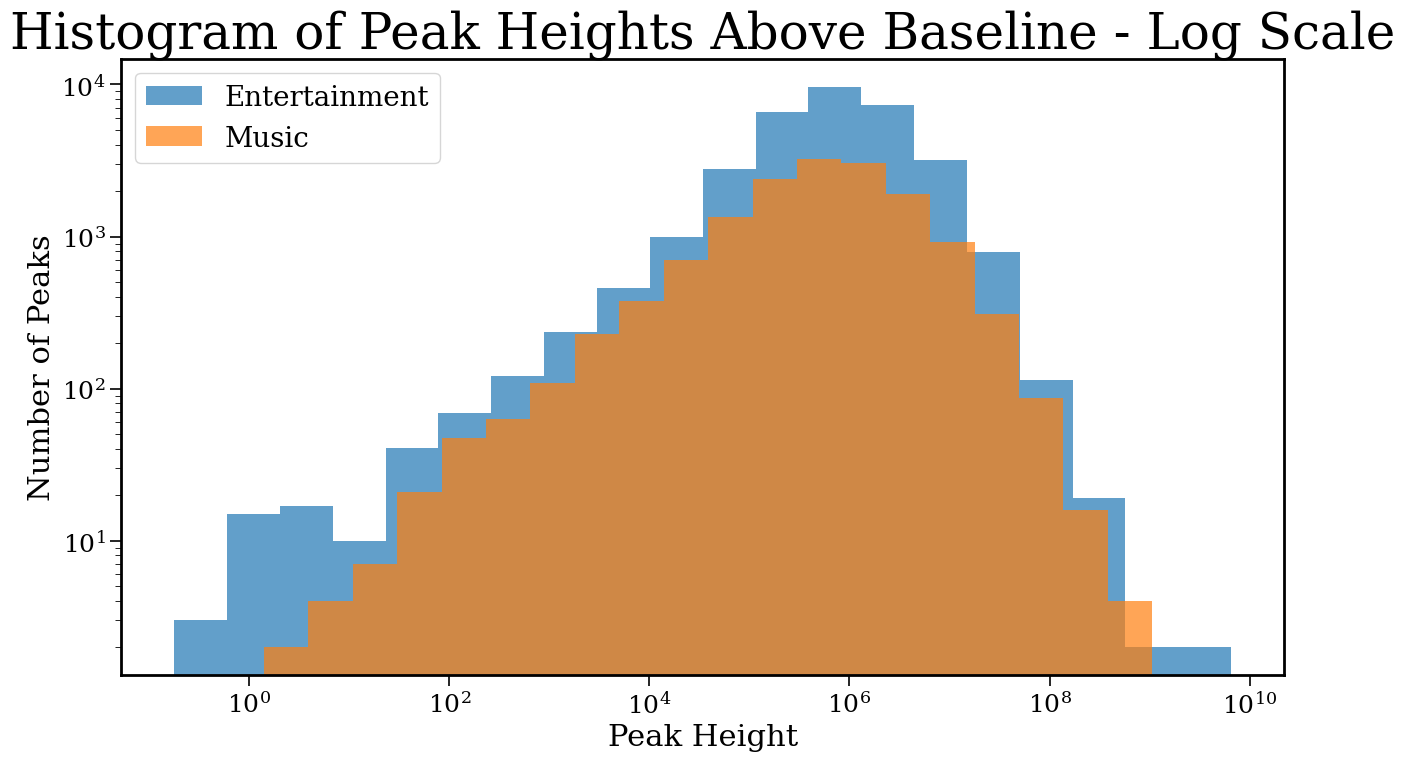

In [247]:
# Plot Histogram of peak heights
consistency_utils.peak_heights_histogram(music_peaks_filtered, ent_peaks_filtered)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


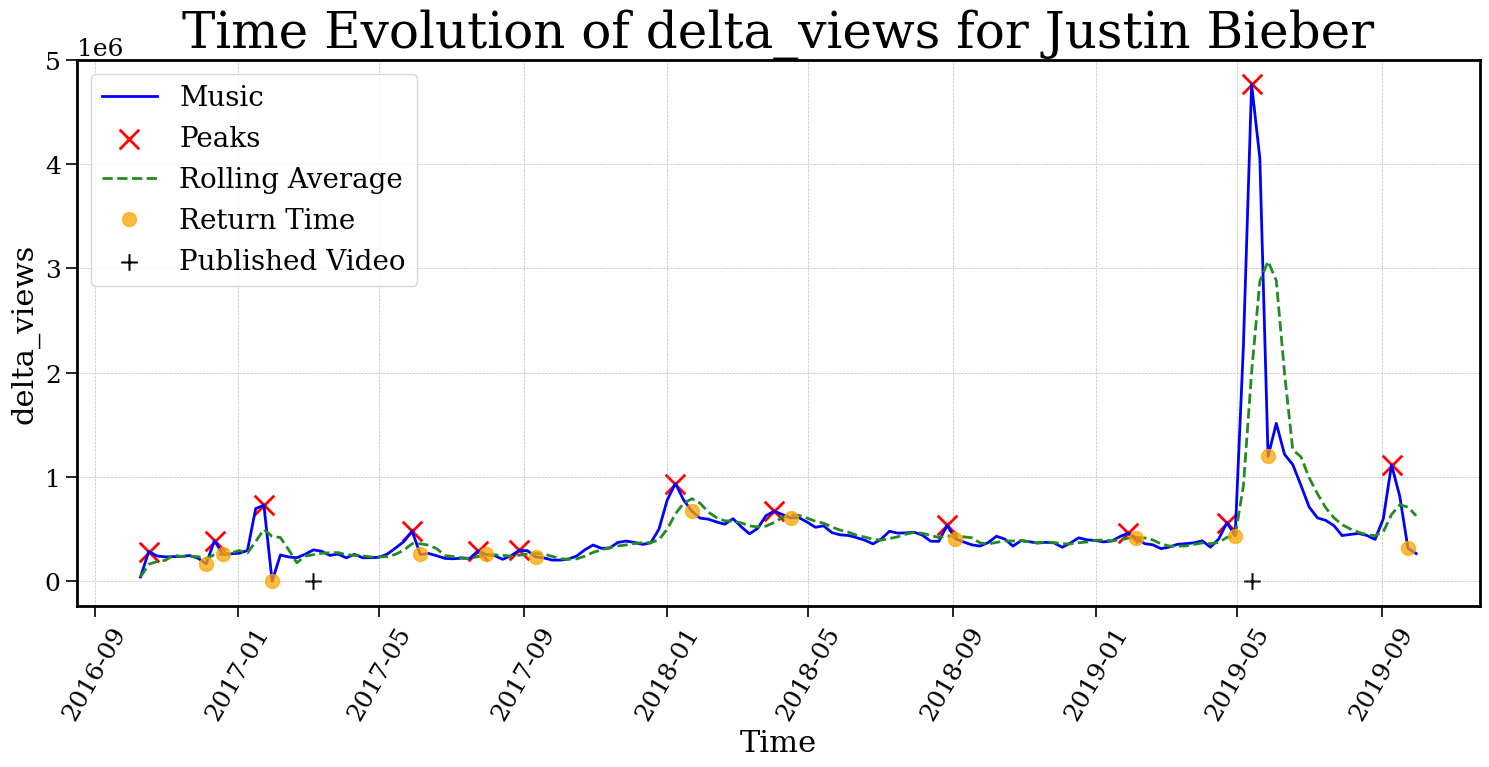

In [319]:
# Justin Bieber delta_views time-series
consistency_utils.plot_channel_time_series(df_channels, df_time_series, channel_name='Justin Bieber', metric='delta_views', prom_percent=0.3, 
                                     rolling_window=4, tolerance=0.1, max_return_time=10)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


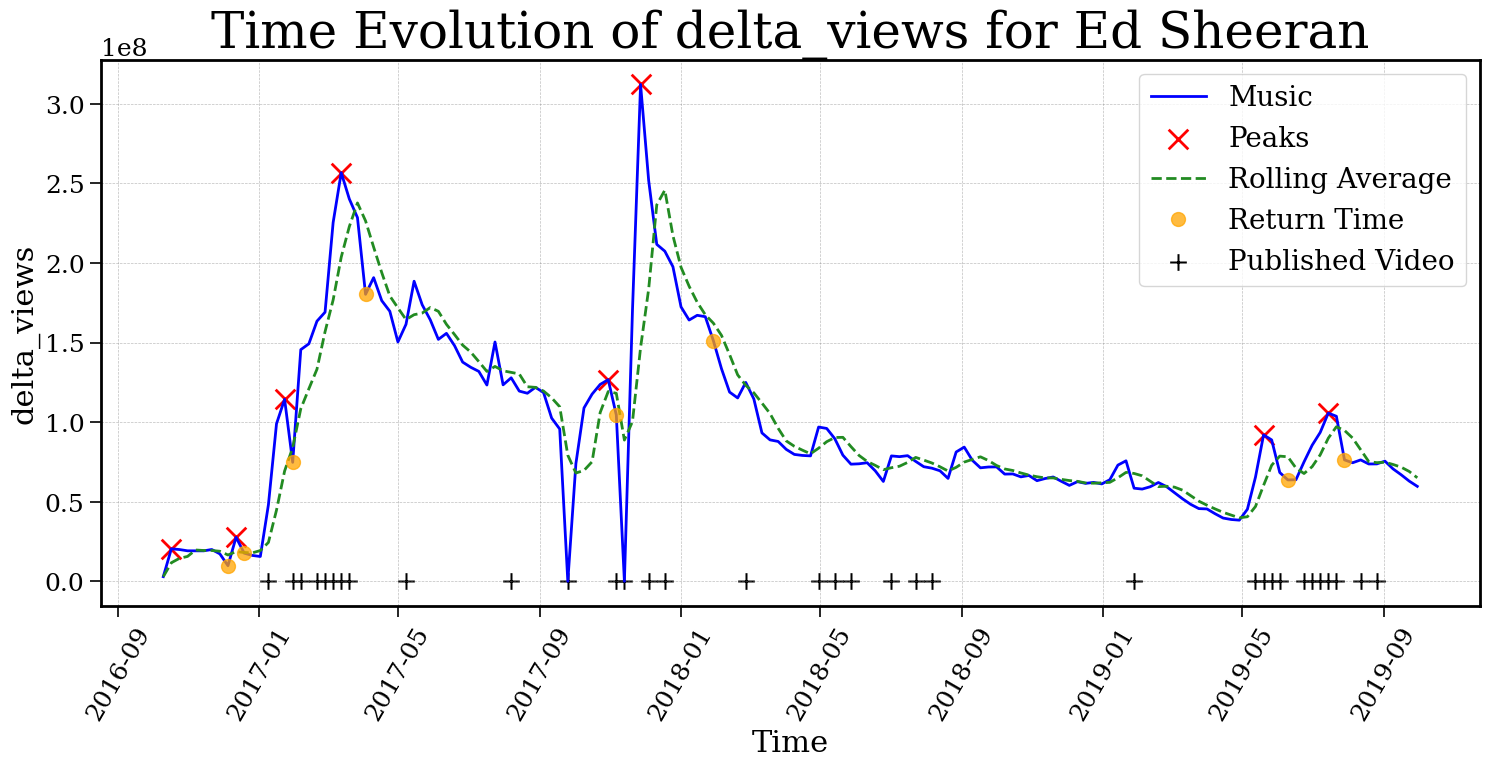

In [318]:
# Ed Sheeran delta_views time-series
consistency_utils.plot_channel_time_series(df_channels, df_time_series, channel_name='Ed Sheeran', metric='delta_views', prom_percent=0.3, 
                                     rolling_window=4, tolerance=0.1, max_return_time=10)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


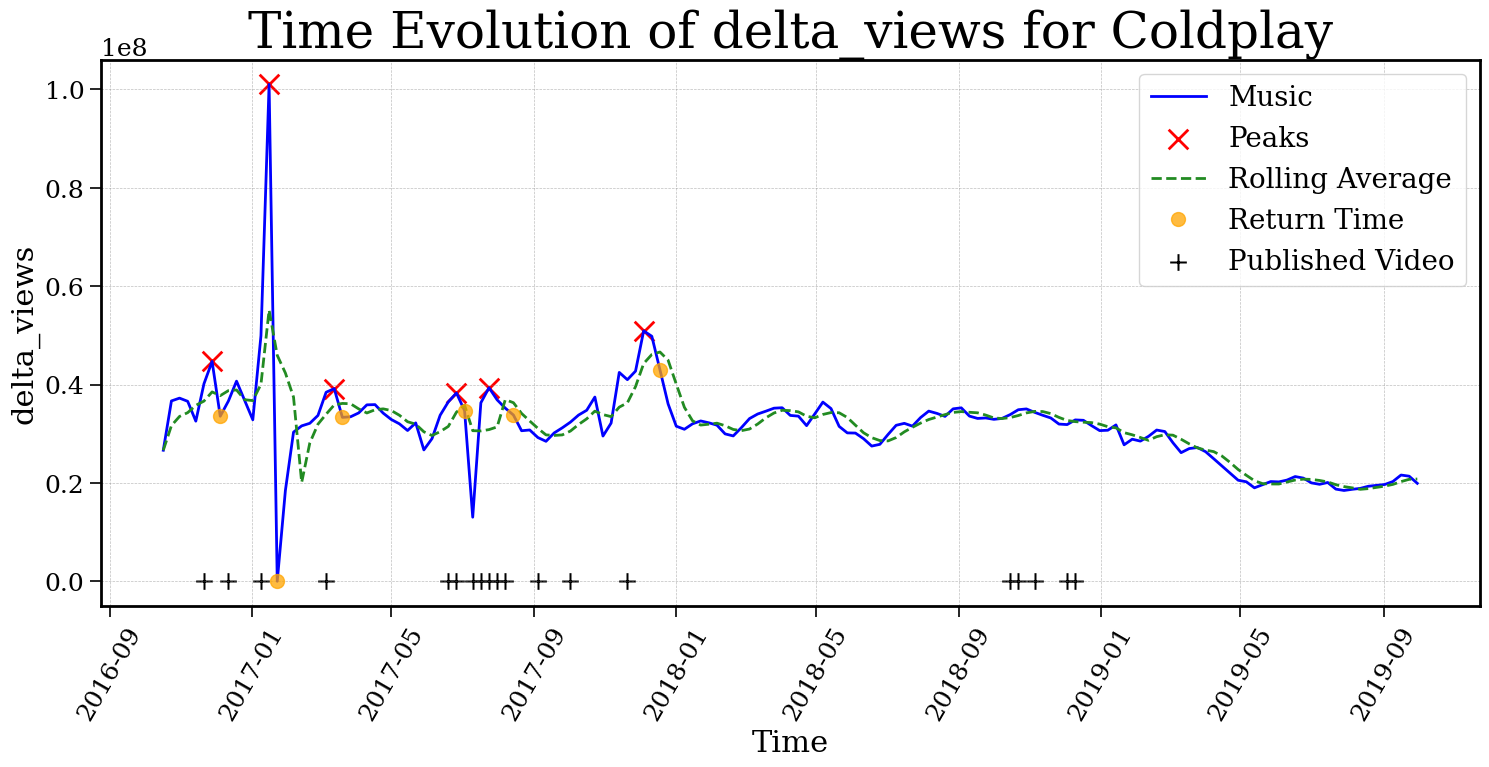

In [320]:
# Coldplay delta_views time-series
consistency_utils.plot_channel_time_series(df_channels, df_time_series, channel_name='Coldplay', metric='delta_views', prom_percent=0.3, 
                                     rolling_window=4, tolerance=0.1, max_return_time=10)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


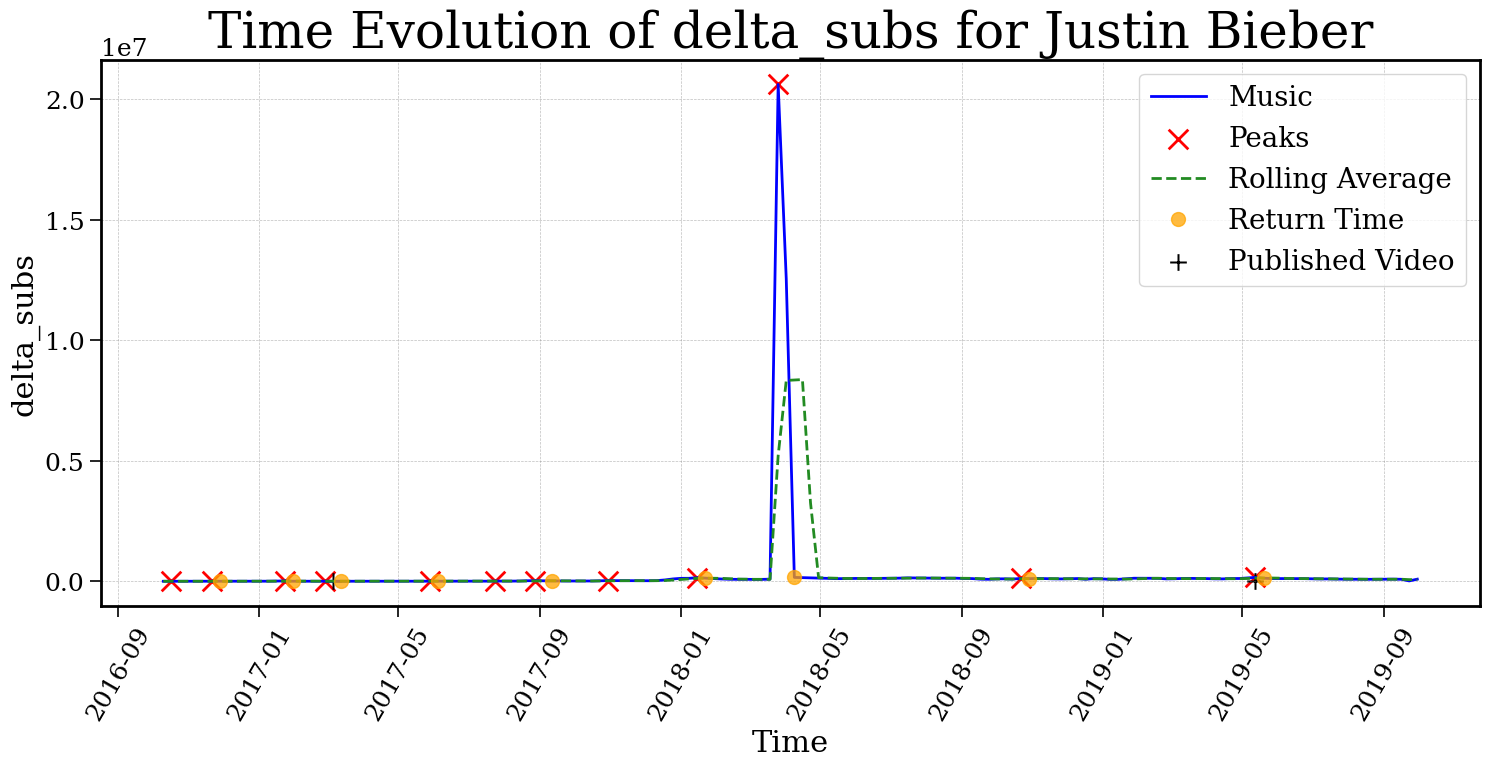

In [321]:
# Justin Bieber delta_subs time-series
consistency_utils.plot_channel_time_series(df_channels, df_time_series, channel_name='Justin Bieber', metric='delta_subs', prom_percent=0.3, 
                                     rolling_window=4, tolerance=0.1, max_return_time=10)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


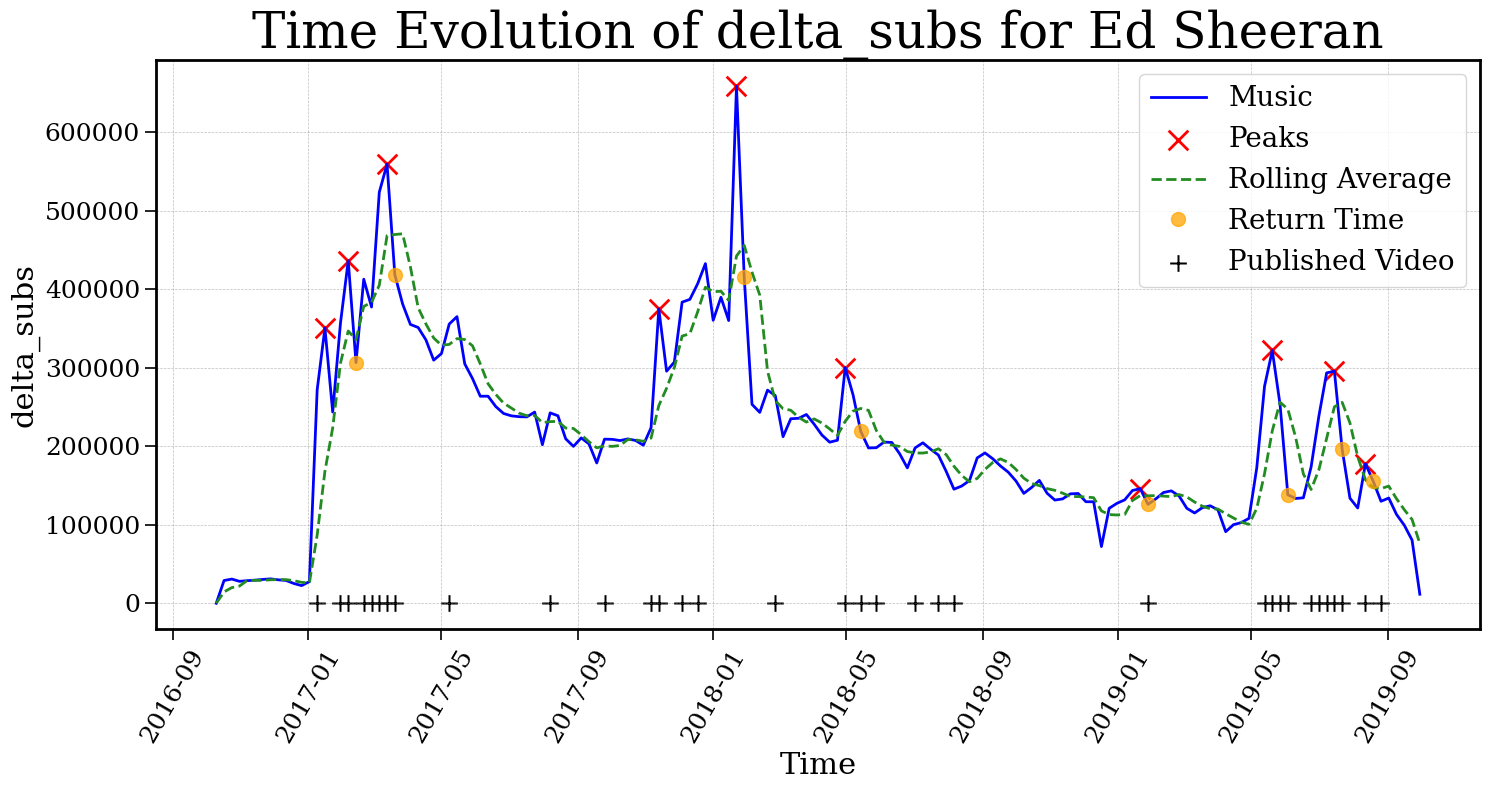

In [322]:
# Ed Sheeran delta_subs time-series
consistency_utils.plot_channel_time_series(df_channels, df_time_series, channel_name='Ed Sheeran', metric='delta_subs', prom_percent=0.3, 
                                     rolling_window=4, tolerance=0.1, max_return_time=10)